In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
three_distance_metric___list =["cosine", "jaccard","pearson"]
sns_three_color = ["windows blue","dusty purple","faded green"]
sns_palette = [sns.xkcd_rgb[color__] for color__ in sns_three_color]

In [45]:
# EFFORT reduction
benchmark_reduction = 0.2099047619
effort_reduction = [[0.2492857143,
                     0.7921428571,
                     0.7921428571,
                     0.7921428571,
                     0.4,
                     0.2742857143,],

                    [
                     0.2105047619,
                     0.7878,
                     0.7578,
                     0.7878,
                     0.3646,
                     0.2104, ],

                    [0.2211904762,
                     0.6928571429,
                     0.6928571429,
                     0.6928571429,
                     0.3193,
                     0.2210857143, ],

                    [0.214047619,
                     0.5569047619,
                     0.5569047619,
                     0.5369047619,
                     0.2783333333,
                     0.214047619, ]]

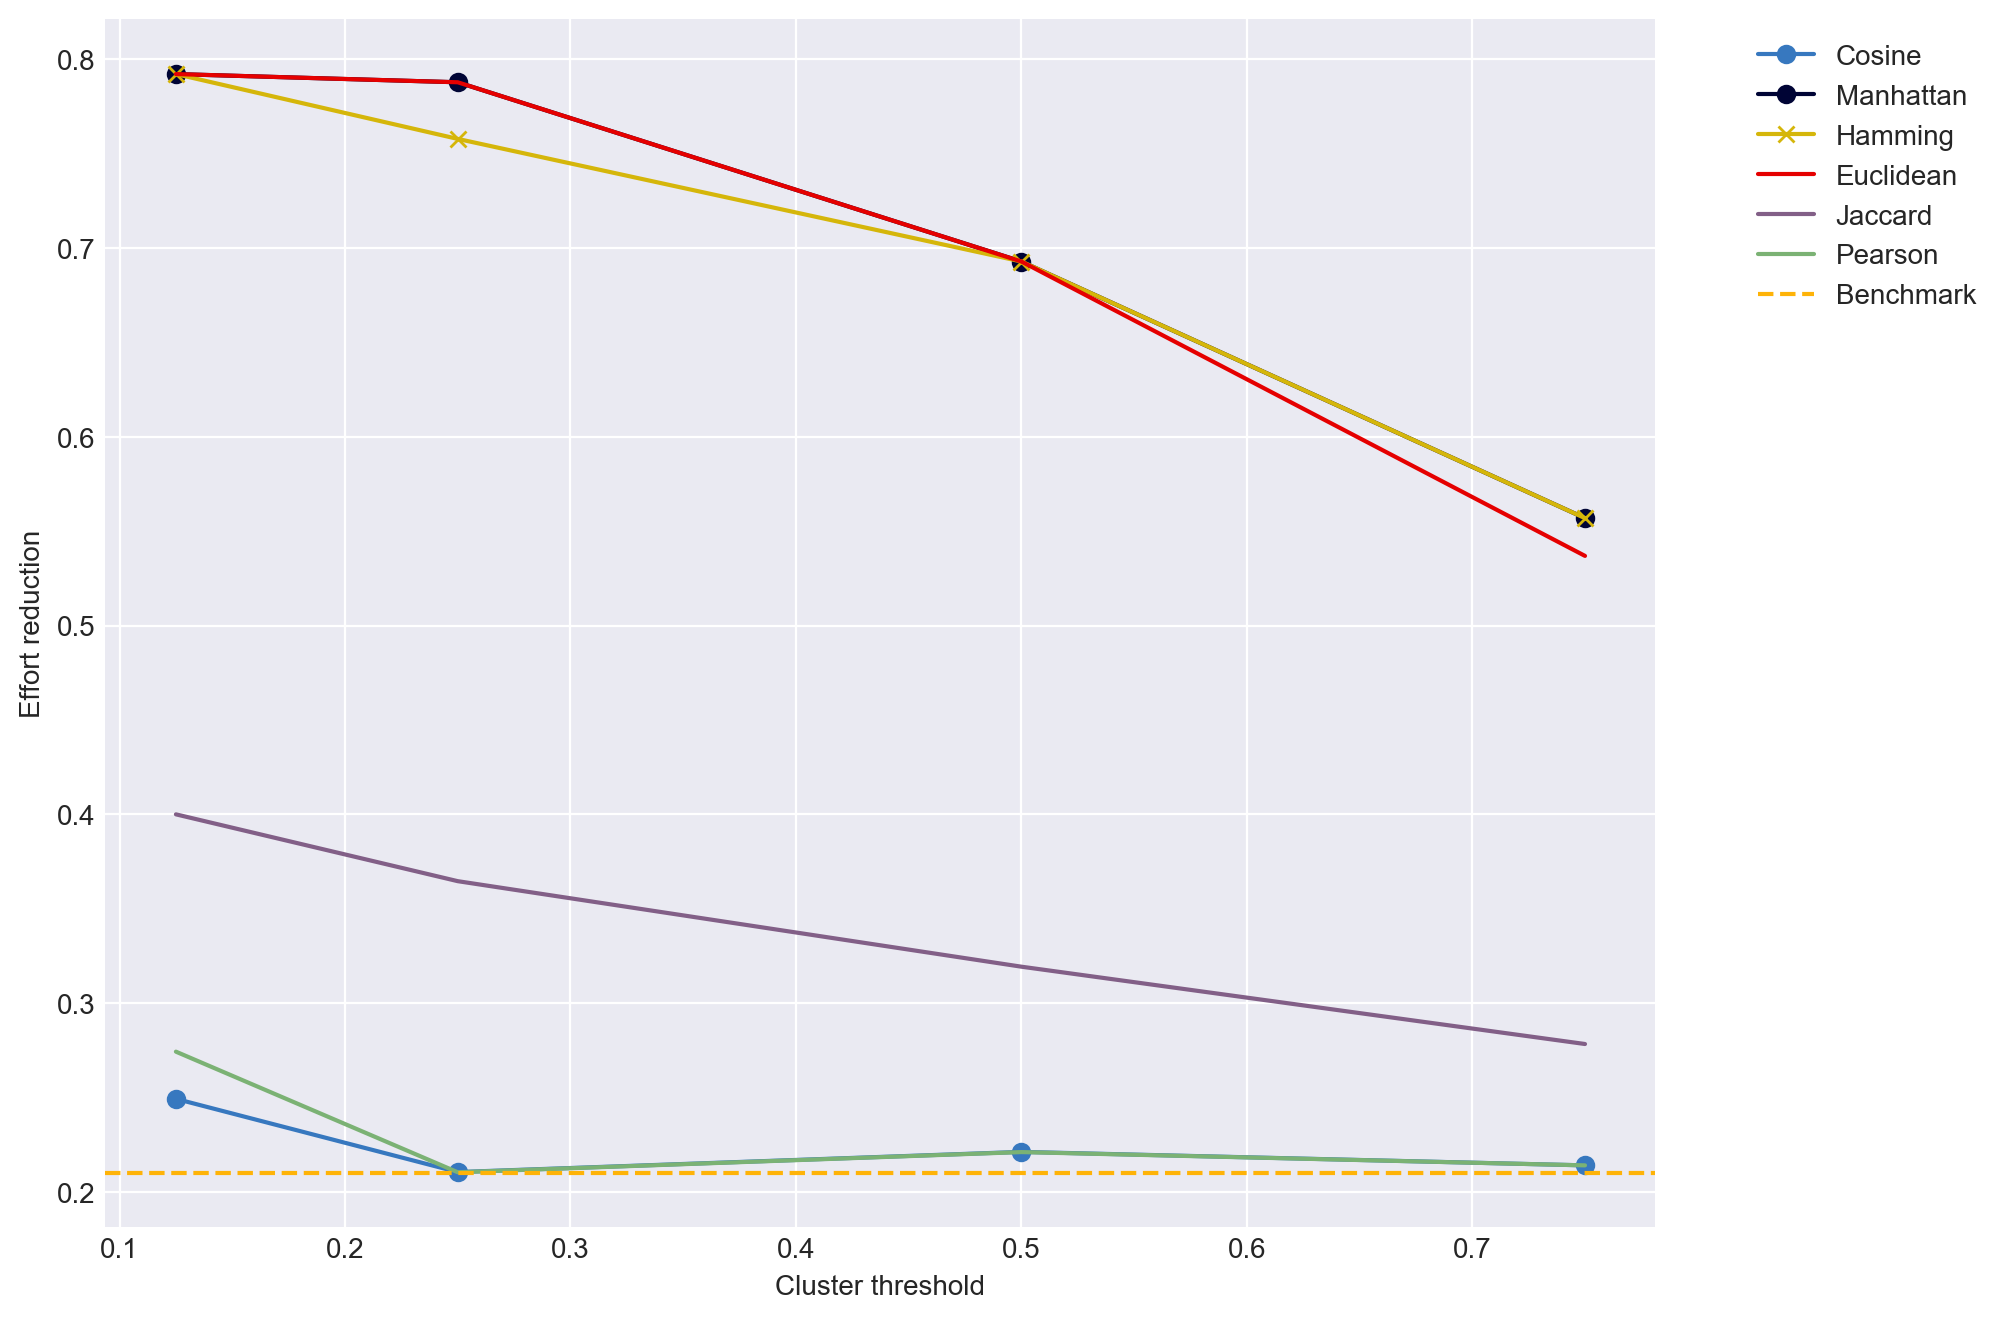

In [156]:
final_filter = [0.125, 0.25, 0.50, 0.75]
sns_six_color = ["windows blue","dark navy","dark yellow","red","dusty purple","faded green"]
cosine_effort = [item[0] for item in effort_reduction]

manhattan_effort = [item[1] for item in effort_reduction]
hamming_effort = [item[2] for item in effort_reduction]
euclidean_effort = [item[3] for item in effort_reduction]
jaccard_effort = [item[4] for item in effort_reduction]
pearson_effort = [item[5] for item in effort_reduction]
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")
plt.plot(final_filter,cosine_effort, label="Cosine",color=sns.xkcd_rgb[sns_six_color[0]],marker="o")
plt.plot(final_filter,manhattan_effort, label="Manhattan",color=sns.xkcd_rgb[sns_six_color[1]],marker ="o")
plt.plot(final_filter,hamming_effort, label="Hamming",color=sns.xkcd_rgb[sns_six_color[2]],marker="x")
plt.plot(final_filter,euclidean_effort, label="Euclidean",color=sns.xkcd_rgb[sns_six_color[3]],)
plt.plot(final_filter,jaccard_effort, label="Jaccard",color=sns.xkcd_rgb[sns_six_color[4]],)
plt.plot(final_filter,pearson_effort, label="Pearson",color=sns.xkcd_rgb[sns_six_color[5]],)
plt.axhline(y=benchmark_reduction, color = sns.xkcd_rgb["amber"], linestyle='--', label="Benchmark")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Effort reduction')
plt.xlabel('Cluster threshold')
plt.savefig("output/" +"Effort_Reduction.png",bbox_inches='tight')

In [11]:
import json
distance_nested_list = []
distance_metric=["cosine","cityblock","hamming","euclidean","jaccard","correlation"]
for metric in distance_metric:
    with open("input/"+"min_distance_"+ metric +"_clustering") as input:
        distance_nested_list.append(json.load(input))


In [131]:
distance_matrix_list = []
for metric in distance_metric:
    with open("input/"+"new_log_distance"+ metric +".json") as input:
        distance_matrix_list.append(json.load(input))
with open("input/"+"new_log_observation.json") as input:
        new_log_observation=json.load(input)
# new_log_observation

<Figure size 2400x2400 with 0 Axes>

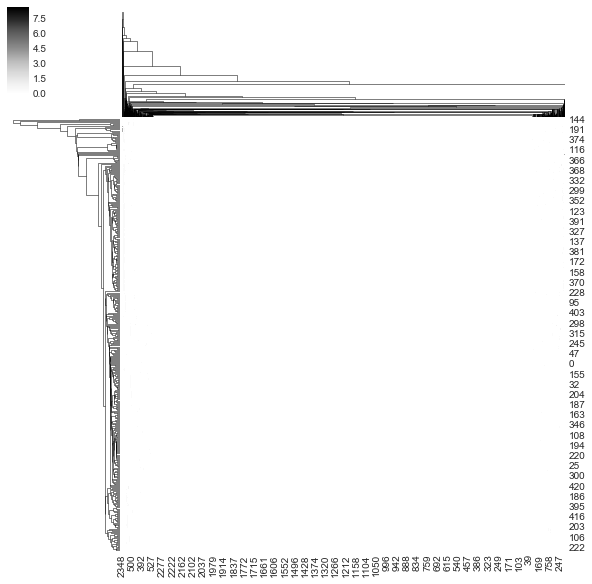

In [134]:
plt.figure(figsize=(12,12), dpi=200)
sns.clustermap(new_log_observation,method='complete',metric='euclidean',cmap='Greys')
plt.savefig("output/" +"euclidean" +"_clustermap.png")

In [119]:
for index__ in range(0,len(distance_metric)):
    metric = distance_metric[index__]
    distance_matrix = distance_matrix_list[index__]
#     plt.figure(figsize=(10,8), dpi=200)
#     sns.heatmap(distance_matrix_list[index__], cmap="YlGnBu")
#     plt.savefig("output/" +metric.title() +"_new_log_distance.png")


In [ ]:
for index__ in range(0,len(distance_metric)):
    metric = distance_metric[index__]
    

In [135]:
percentile_list = [12.5, 25, 50, 75, 87.5]
def find_percentile(one_list, percentage):
    temp_list = [item for item in one_list if item >0]
    return np.percentile(temp_list, percentage)
# find_percentile(distance_nested_list[0],87.5)

0.6931684848189194

/Users/keya/anaconda3/envs/ML/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


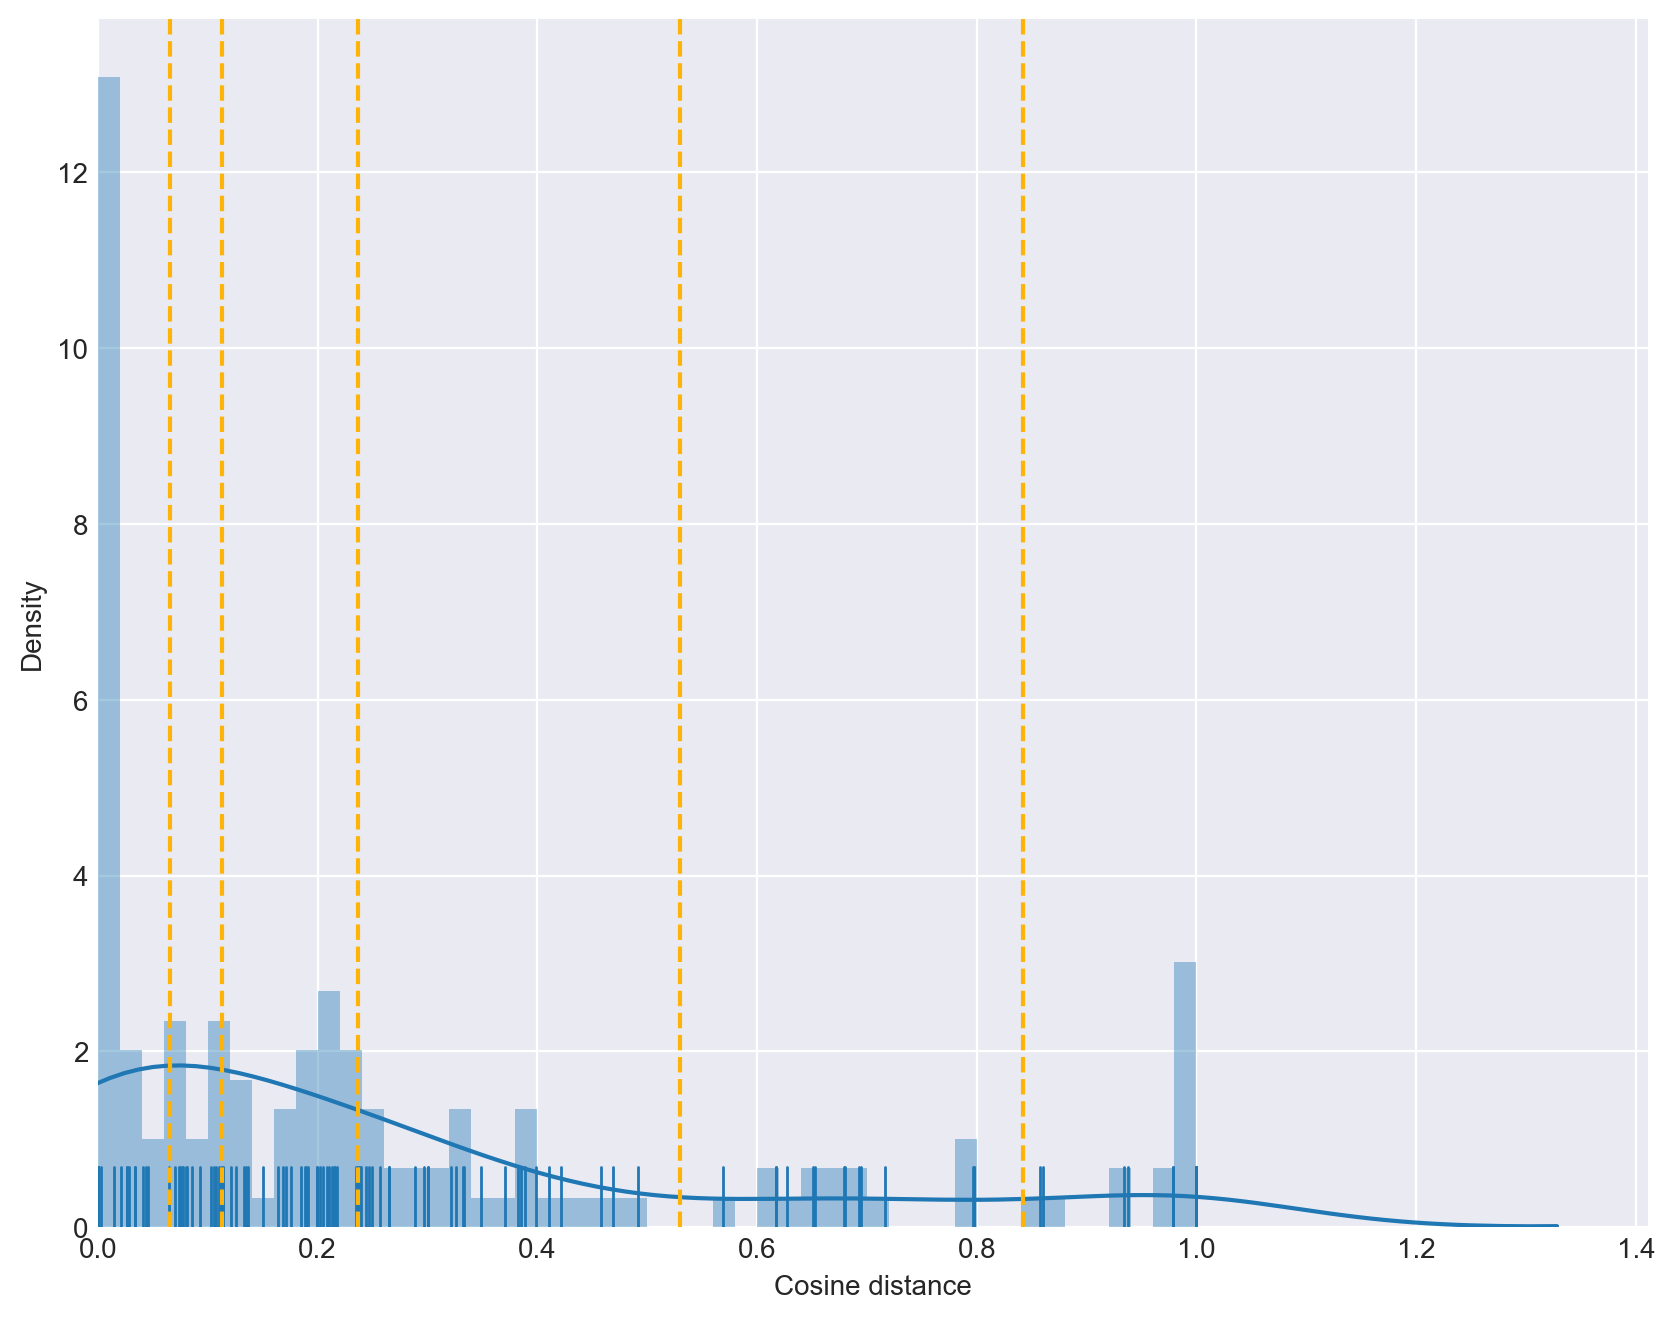

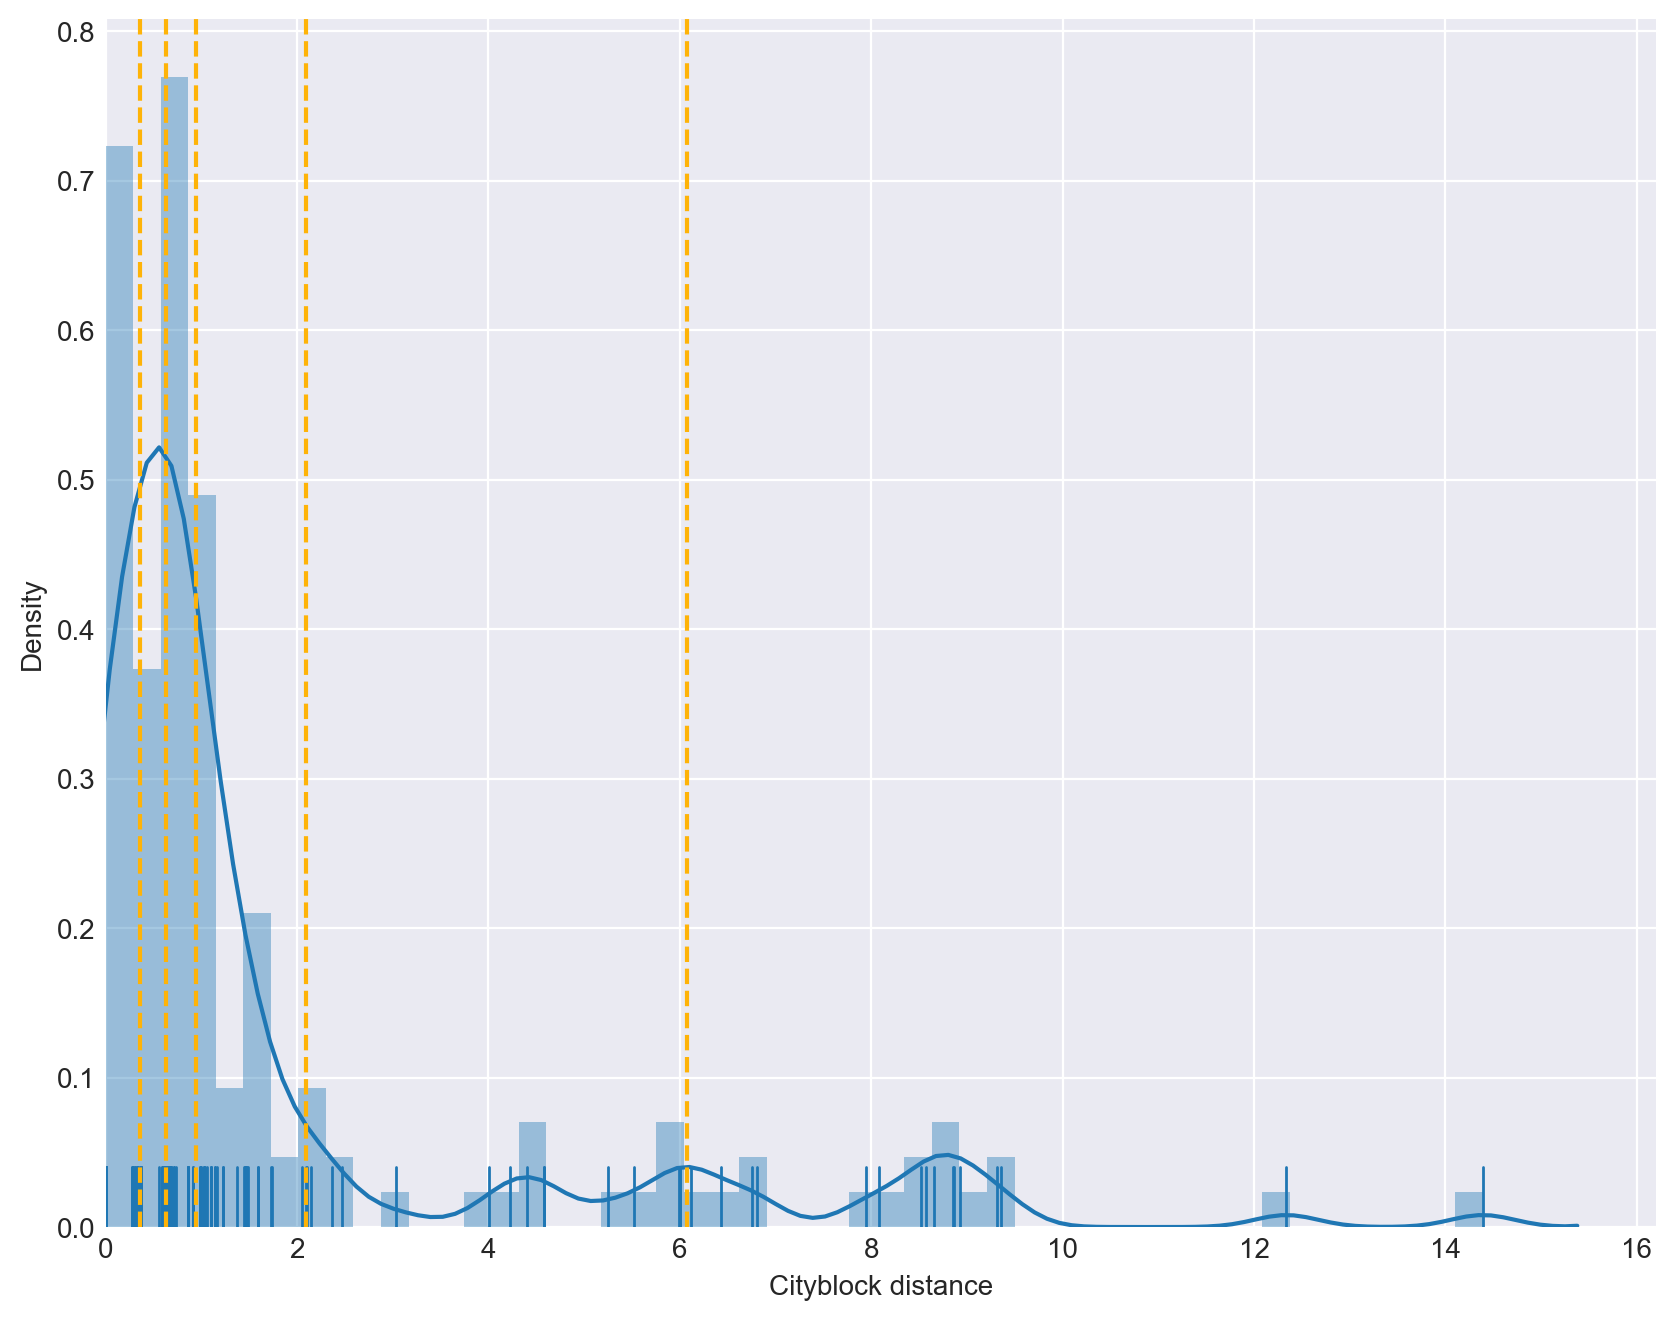

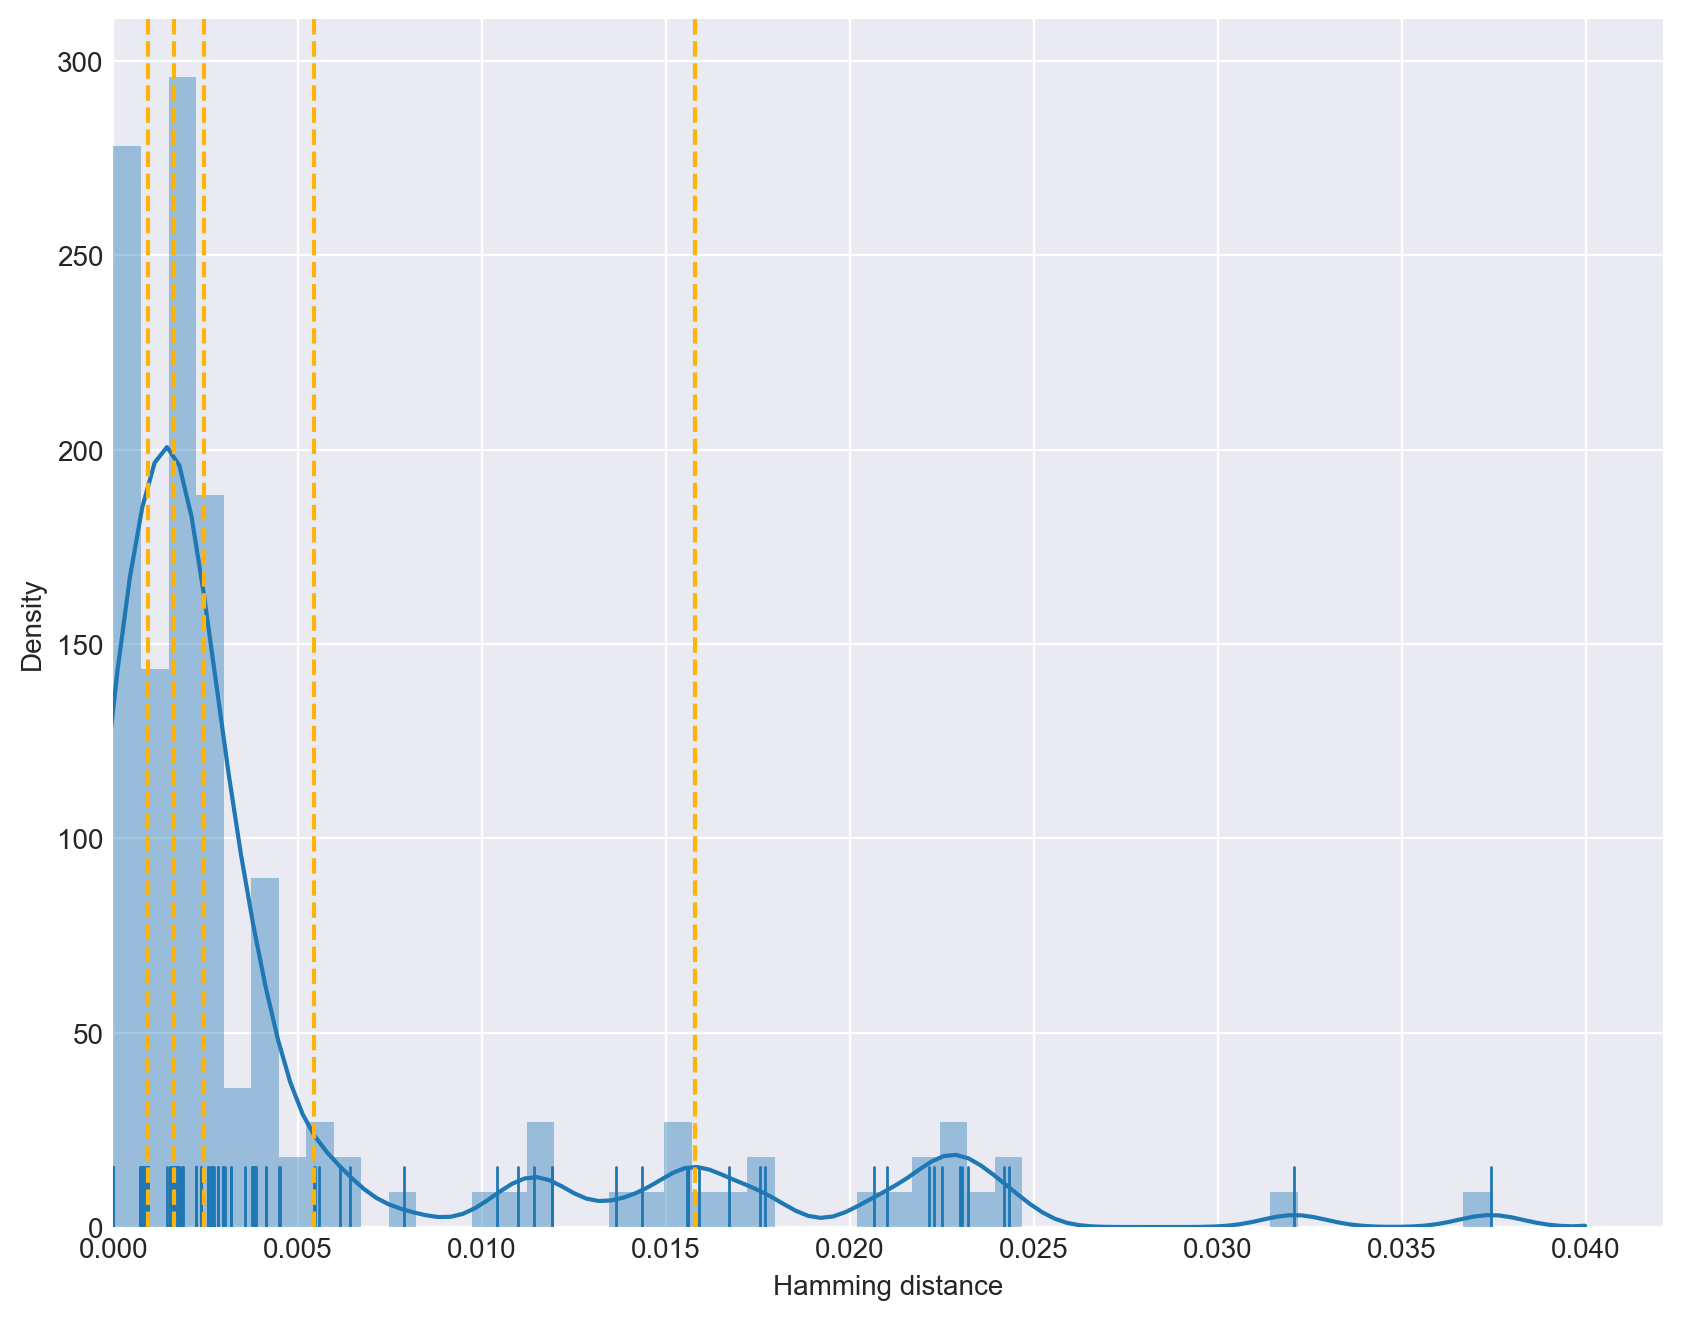

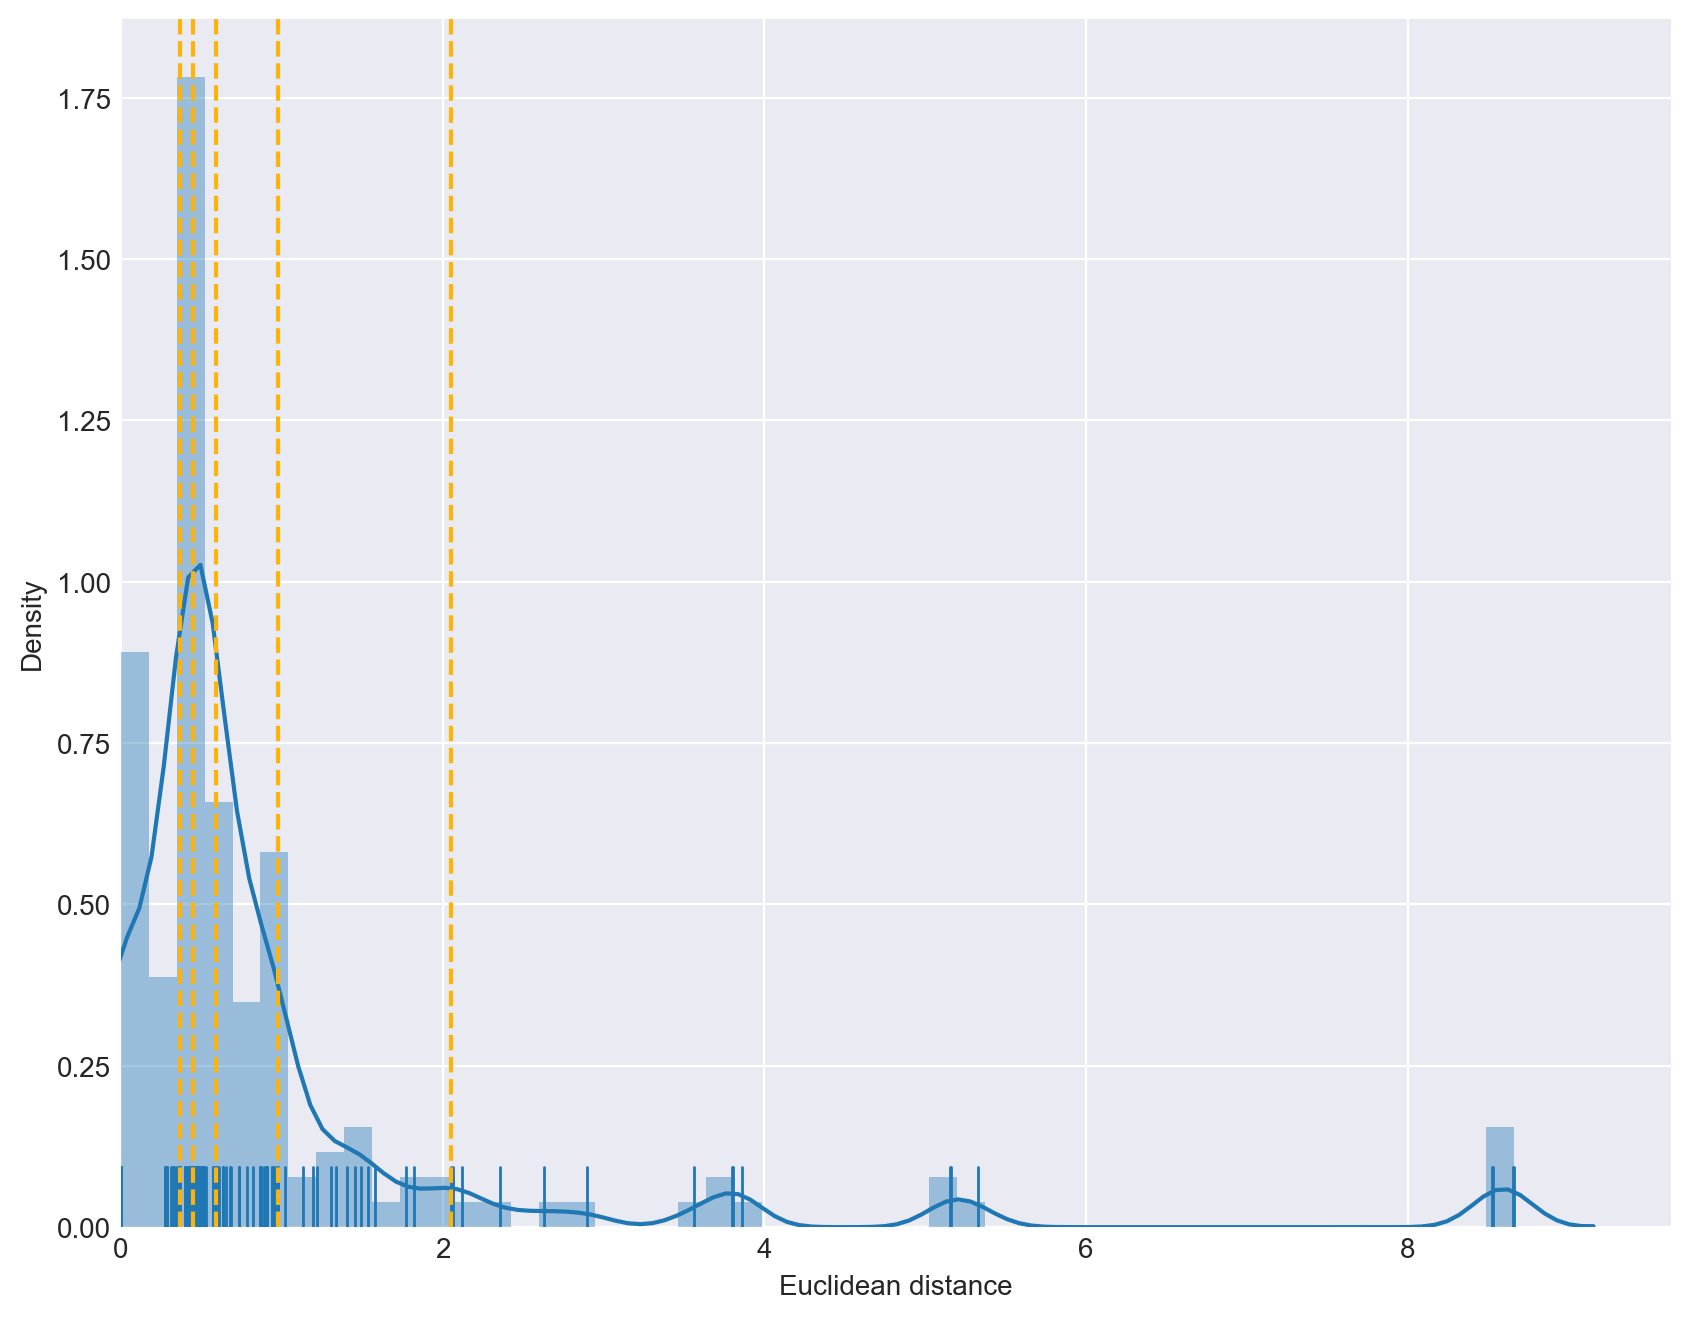

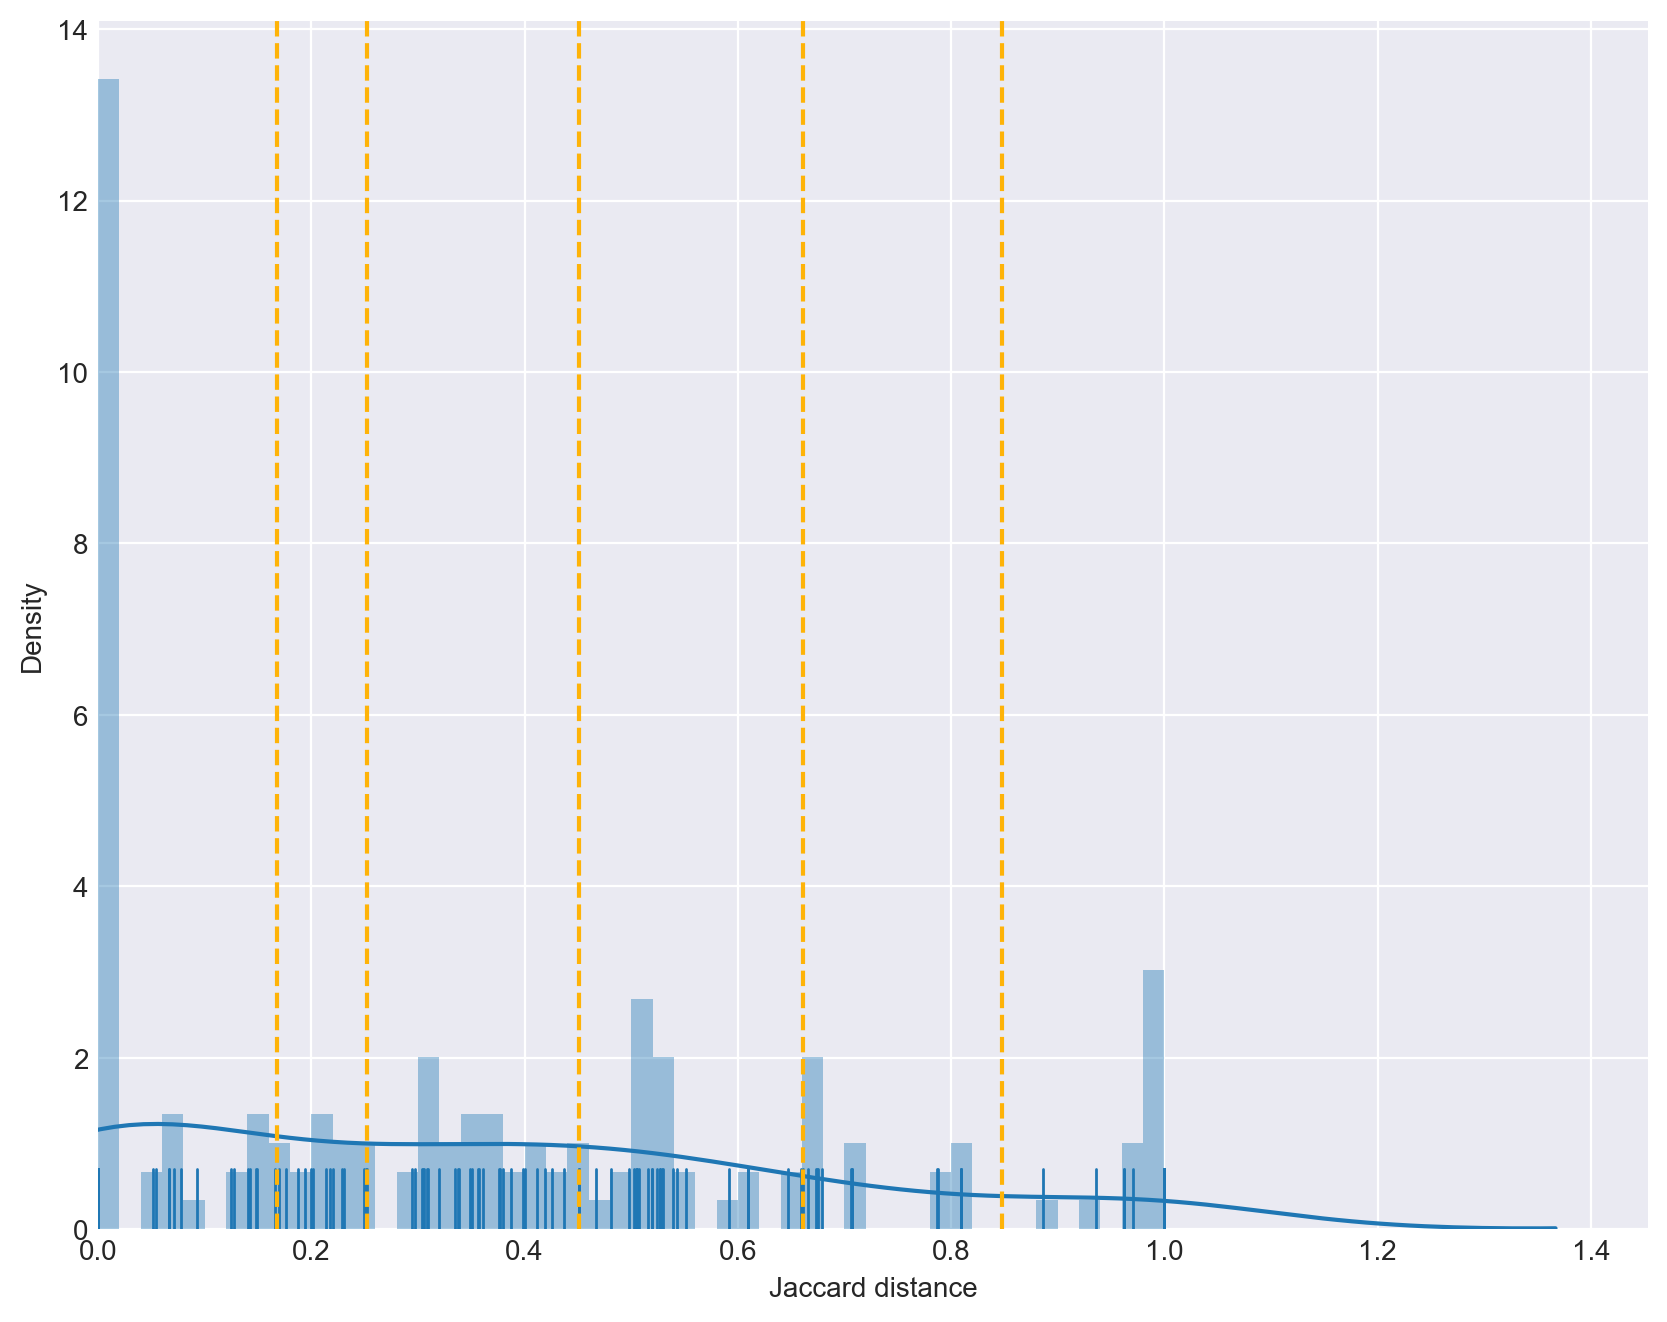

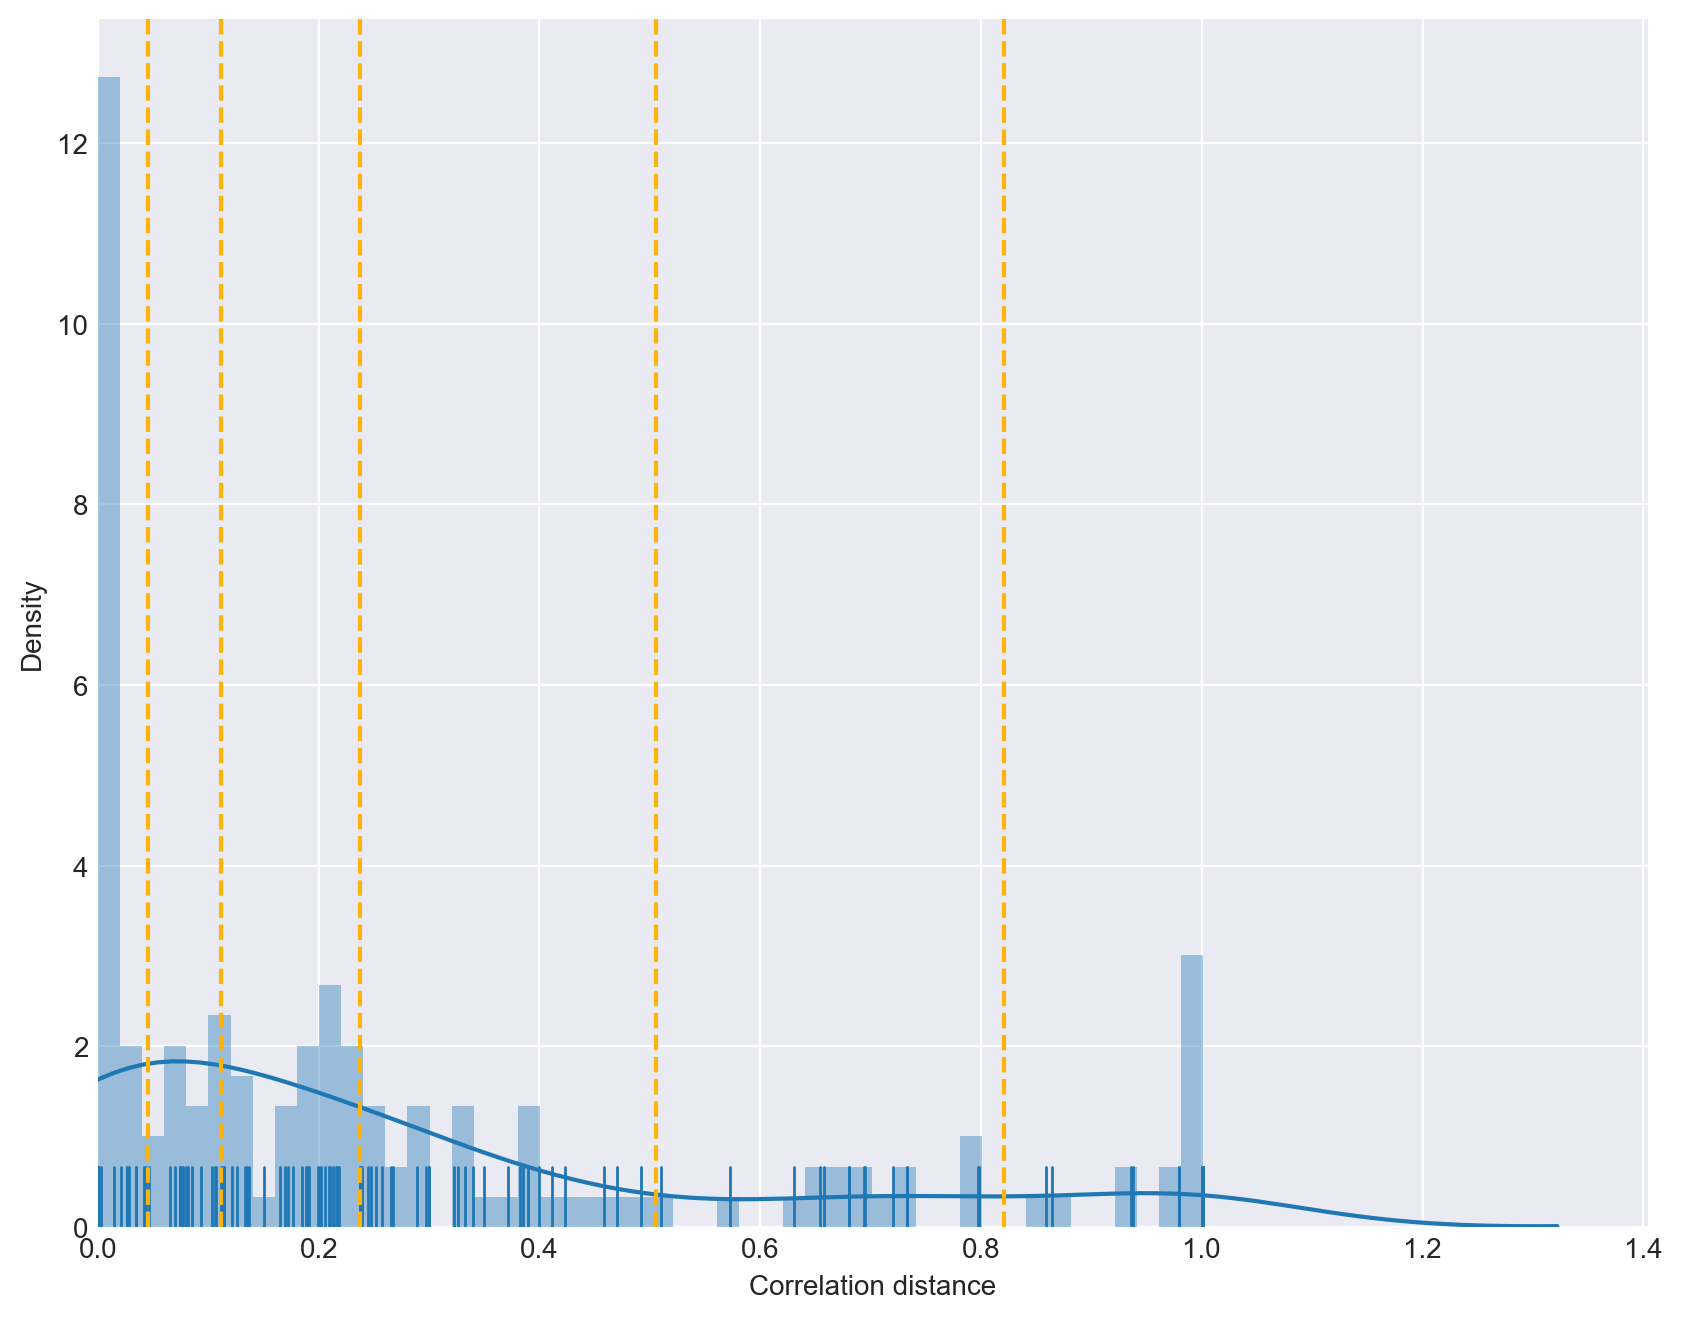

In [136]:
# index__ = 0
for index__ in range(0,len(distance_metric)):
    metric = distance_metric[index__]
    plt.figure(figsize=(10,8), dpi=200)
    our_distance__ = distance_nested_list[index__]
    binwidth= (max(our_distance__) - min(our_distance__))/50
    lm = sns.distplot(distance_nested_list[index__],bins=np.arange(min(our_distance__),max(our_distance__)+binwidth,binwidth),
                      norm_hist=True, kde=True, rug=True)
    for percentile__ in percentile_list:
        x_line__ = find_percentile(distance_nested_list[index__], percentile__)
        plt.axvline(x=x_line__, color = sns.xkcd_rgb["amber"], linestyle='--')
    axes = lm.axes
    plt.xlabel(metric.title() +" distance")
    plt.ylabel("Density")
    axes.set_xlim(0)
    plt.savefig("output/" +metric.title() +"_distance.png")

In [17]:
data_cluster_threshold=\
[[[0.1964285714,
0.1465108676,
0.1465108676,
0.1465108676,
0.2432539683,
0.2016369048,]
,
[0.4375,
0.2045454545,
0.2045454545,
0.2045454545,
0.4571428571,
0.5625,]
,
[0.2,
0.1773809524,
0.1773809524,
0.2851128472,
0.3485714286,
0.08452380952,]
,
[0.075,
0.05238095238,
0.05238095238,
0.1601128472,
0.1485714286,
0.04285714286]],

[[
0.1964286667,
0.147320125,
0.149024625,
0.149024625,
0.18450175,
0.2142858095]
,
[
0.4375,
0.2077375,
0.26705,
0.213425,
0.4375041667,
0.5625,]
,
[
0.0958375,
0.054301625,
0.061301625,
0.1629325,
0.0928571425,
0.0553571425,]
,
[
0.25,
0.33925,
0.25,
0.4285,
0.25,
0.375,]],

[[0.4080357143,
0.1736011905,
0.1736011905,
0.1861011905,
0.394932209,
0.4199404762,]
,

[0.625,
0.26875,
0.26875,
0.39375,
0.6279761905,
0.7083333333]
,
[0.1083333333,
0.05933531746,
0.05933531746,
0.1809325397,
0.0994047619,
0.08333333333,]
,
[0.3333333333,
0.325,
0.325,
0.475,
0.3333333333,
0.4166666667]],

[[0.4223214286,
0.1697089947,
0.1697089947,
0.181712963,
0.419058642,
0.4327380952]
,
[0.75,
0.3888888889,
0.3888888889,
0.5138888889,
0.7222222222,
0.8333333333]
,
[0.1083333333,
0.06170634921,
0.06483134921,
0.1723710317,
0.0994047619,
0.08541666667]
,
[0.3333333333,
0.375,
0.375,
0.5,
0.3333333333,
0.4166666667]],

[[0.4031385281,
0,
0,
0,
0.3901515152,
0.4258658009]
,
[0.6363636364,
0,
0,
0,
0.5454545455,
0.7272727273,]
,
[0.1131313131,
0,
0,
0,
0.09646464646,
0.1017676768,]
,
[0.3636363636,
0,
0,
0,
0.2727272727,
0.4545454545,]]]

benchmark_list_____ = [0.4988095952,0.75,0.1777805556,0.4166666667]
Benchmark_MAP_weight = benchmark_list_____[0]
Benchmark_MAP_distance = benchmark_list_____[2]
Benchmark_recall_weight = benchmark_list_____[1]
Benchmark_recall_distance = benchmark_list_____[3]
MAP_weight = [item[0] for item in data_cluster_threshold]
Recall_weight = [item[1] for item in data_cluster_threshold]
MAP_distance = [item[2] for item in data_cluster_threshold]
Recall_distance = [item[3] for item in data_cluster_threshold]
distance_metric__=["cosine","manhattan","hamming","euclidean","jaccard","pearson"]
ignore_distance_set={"manhattan","hamming","euclidean"}
cluster_threshold = [0.125, 0.25, 0.50, 0.75, 0.875]
sns_six_color = ["windows blue","dark navy","dark yellow","red","dusty purple","faded green"]
sns_benchmark = ["amber"]
# sns.xkcd_rgb["amber"]

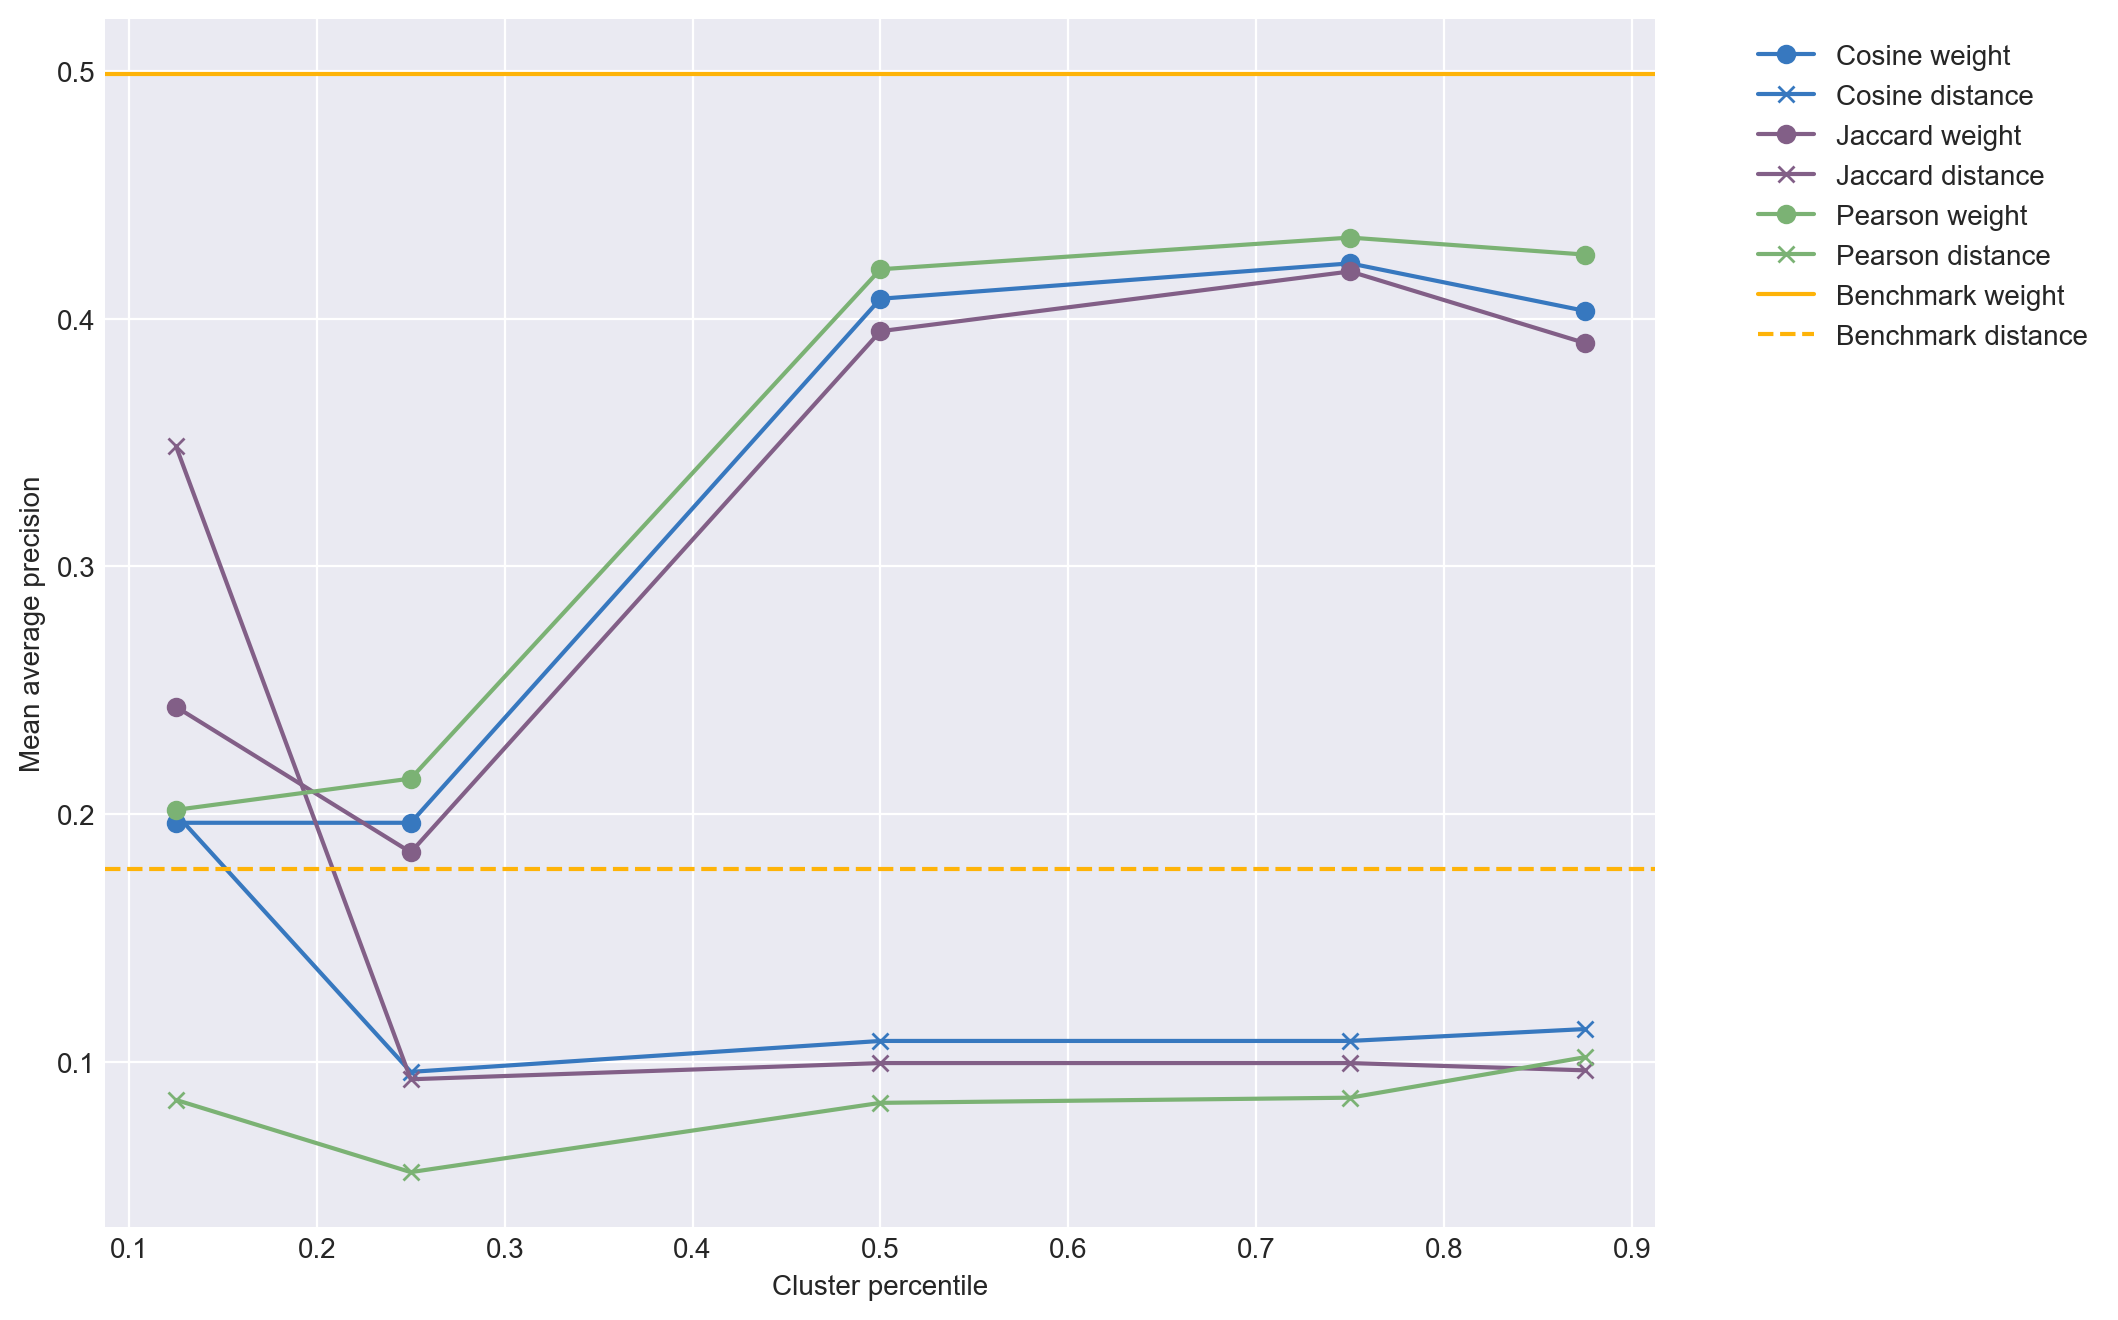

In [35]:
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")
for index in range(0,len(distance_metric__)):
    if distance_metric__[index] in ignore_distance_set:
        continue
    temp_MAP_weight = [item[index] for item in MAP_weight]
    temp_MAP_distance = [item[index] for item in MAP_distance]
    plt.plot(cluster_threshold, temp_MAP_weight,color=sns.xkcd_rgb[sns_six_color[index]], marker="o", label=distance_metric__[index].title()+" weight")
    plt.plot(cluster_threshold, temp_MAP_distance,color=sns.xkcd_rgb[sns_six_color[index]],marker="x", label=distance_metric__[index].title()+" distance")

plt.axhline(y=Benchmark_MAP_weight, color = sns.xkcd_rgb["amber"], linestyle='-', label="Benchmark weight")
plt.axhline(y=Benchmark_MAP_distance, color = sns.xkcd_rgb["amber"], linestyle='--', label="Benchmark distance")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Mean average precision')
plt.xlabel('Cluster percentile')
plt.savefig("output/MAP_cluster_threshold.png",bbox_inches='tight')
# manhattan_MAP_weight = [item[1] for item in MAP_weight]
# hamming_MAP_weight = [item[2] for item in MAP_weight]
# euclidean_weight = [item[3] for item in MAP_weight]
# jaccard_weight = [item[4] for item in MAP_weight]
# pearson_weight = [item[5] for item in MAP_weight]

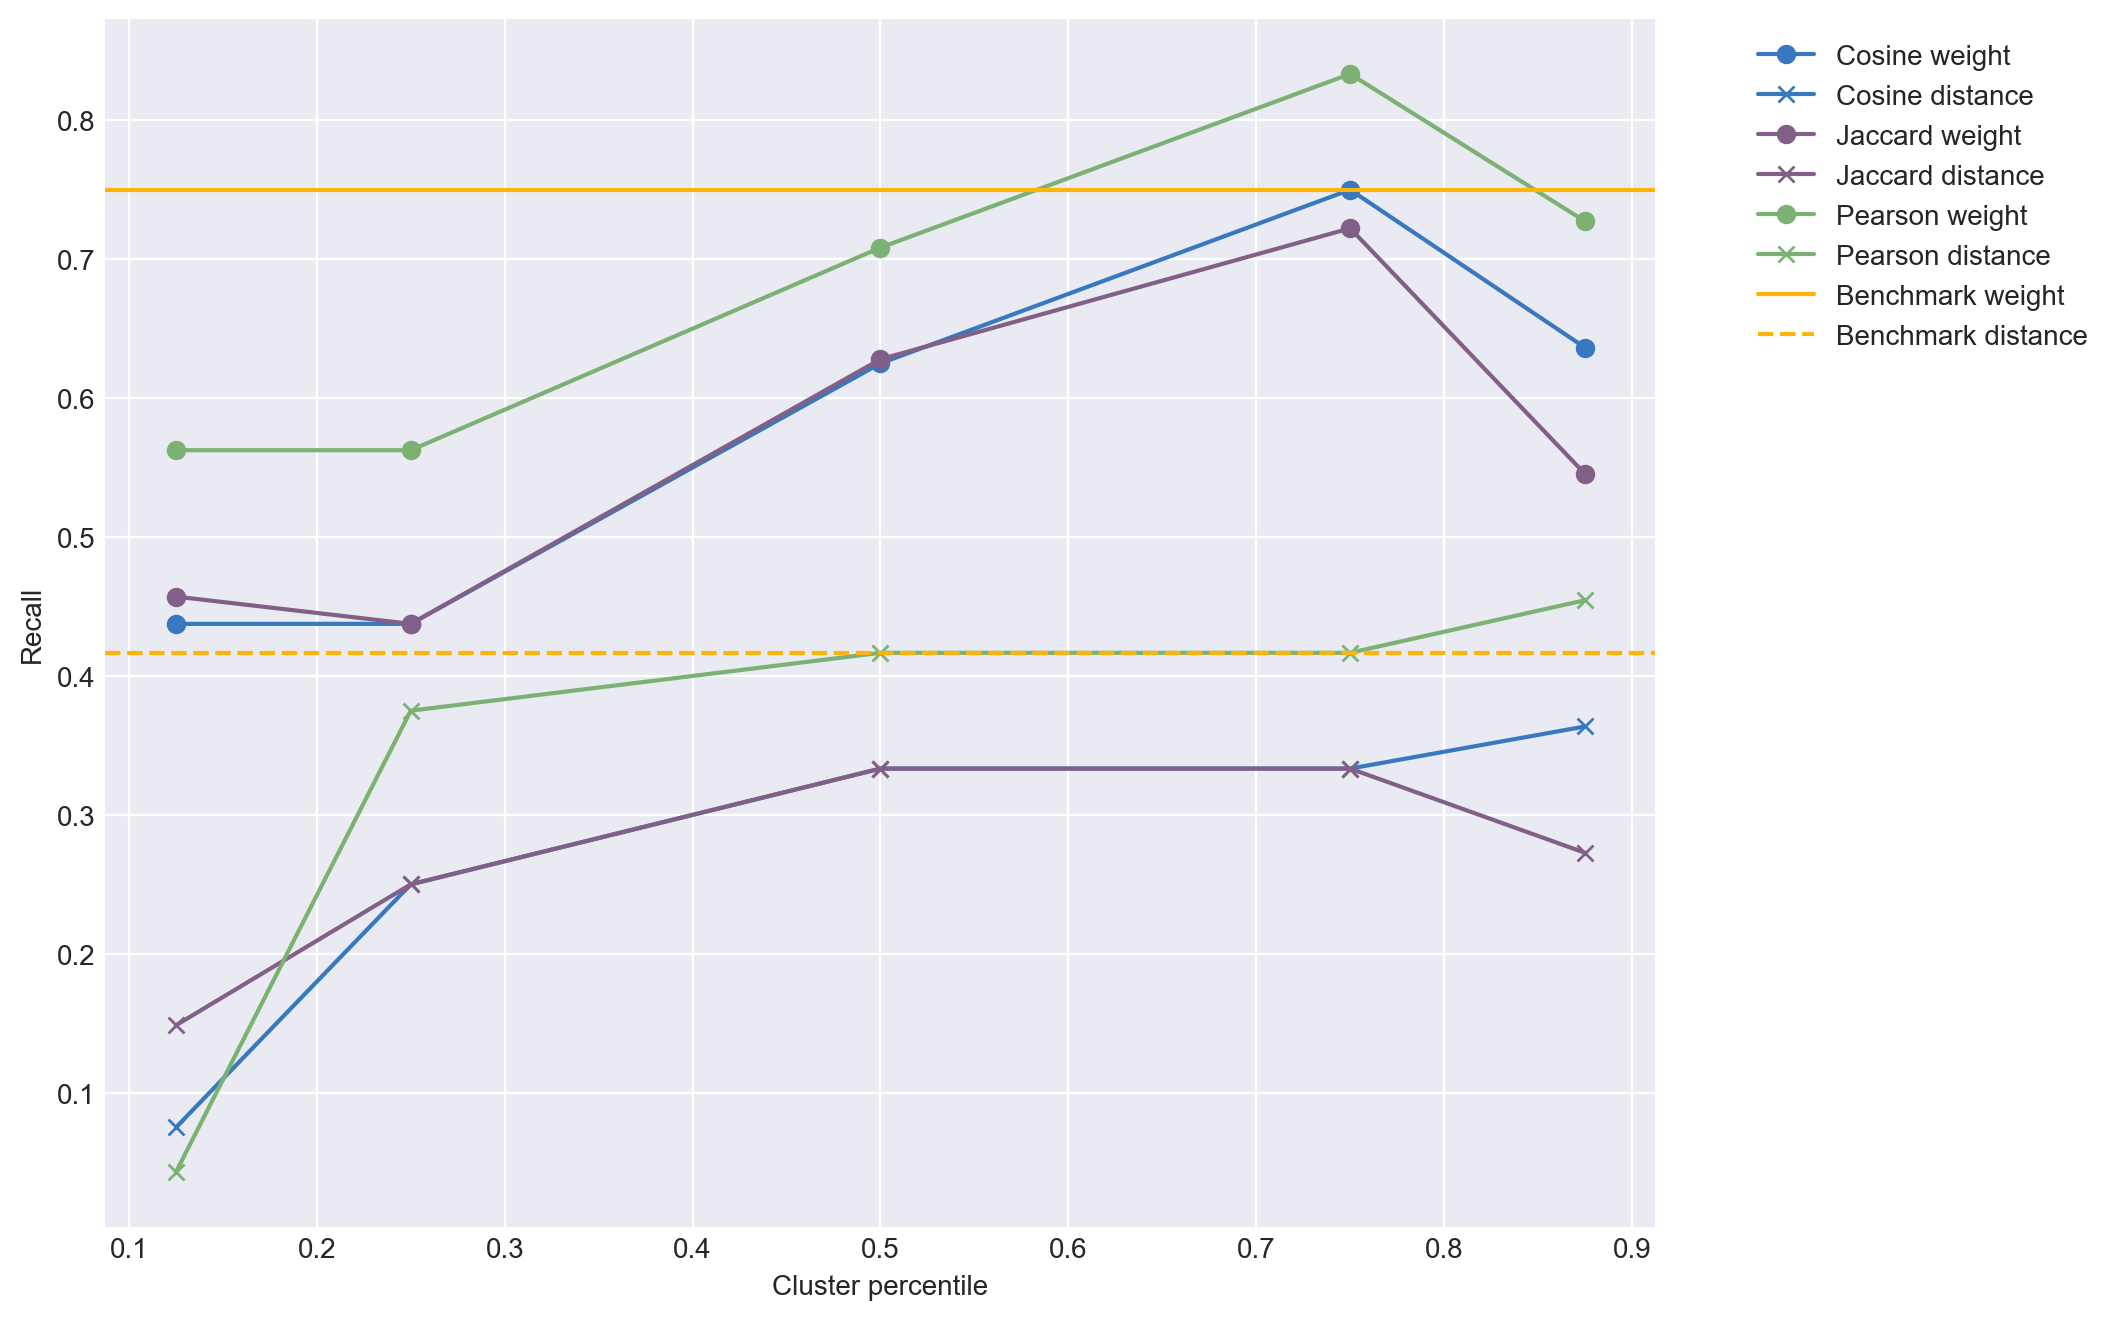

In [19]:
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")
for index in range(0,len(distance_metric__)):
    if distance_metric__[index] in ignore_distance_set:
        continue
    temp_recall_weight = [item[index] for item in Recall_weight]
    temp_recall_distance = [item[index] for item in Recall_distance]
    plt.plot(cluster_threshold, temp_recall_weight,color=sns.xkcd_rgb[sns_six_color[index]], marker="o", label=distance_metric__[index].title()+" weight")
    plt.plot(cluster_threshold, temp_recall_distance,color=sns.xkcd_rgb[sns_six_color[index]],marker="x", label=distance_metric__[index].title()+" distance")

plt.axhline(y=Benchmark_recall_weight, color = sns.xkcd_rgb["amber"], linestyle='-', label="Benchmark weight")
plt.axhline(y=Benchmark_recall_distance, color = sns.xkcd_rgb["amber"], linestyle='--', label="Benchmark distance")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Recall')
plt.xlabel('Cluster percentile')
plt.savefig("output/Recall_cluster_threshold.png",bbox_inches='tight',dpi=200)

In [33]:
Cut_filter = \
[[0.4195436508,
0.4204545455,
0.4195436508,],

[0.8333333333,
0.7272727273,
0.8333333333],

[0.1703703704,
0.1425925926,
0.149537037,],

[0.5,
0.4166666667,
0.5,]]


Constant_cluster_thrshold = \
[
[[0.404265873,
0.3838073192,
0.3953373016,]
,
[0.75,
0.7152777778,
0.75,]
,
[0.1569444444,
0.1145833333,
0.1202380952,]
,
[0.4166666667,
0.4166666667,
0.4166666667,]]
,

[[0.4195436508,
0.3973214286,
0.4195436508,]
,
[0.8333333333,
0.75,
0.8333333333,]
,
[0.1303030303,
0.1406084656,
0.149537037,]
,
[0.4166666667,
0.5,
0.5,]]
,
    
[[0.4112103175,
0.4091269841,
0.4112103175,]
,
[0.75,
0.7777777778,
0.75,]
,
[0.1703703704,
0.1518759019,
0.149537037,]
,
[0.5,
0.4166666667,
0.5,]]
]

MAP_weight__constant = [item[0] for item in Constant_cluster_thrshold]
Recall_weight__constant = [item[1] for item in Constant_cluster_thrshold]
MAP_distance__constant = [item[2] for item in Constant_cluster_thrshold]
Recall_distance__constant = [item[3] for item in Constant_cluster_thrshold]

cluster_distance___ = [ 0.25, 0.50, 0.75]

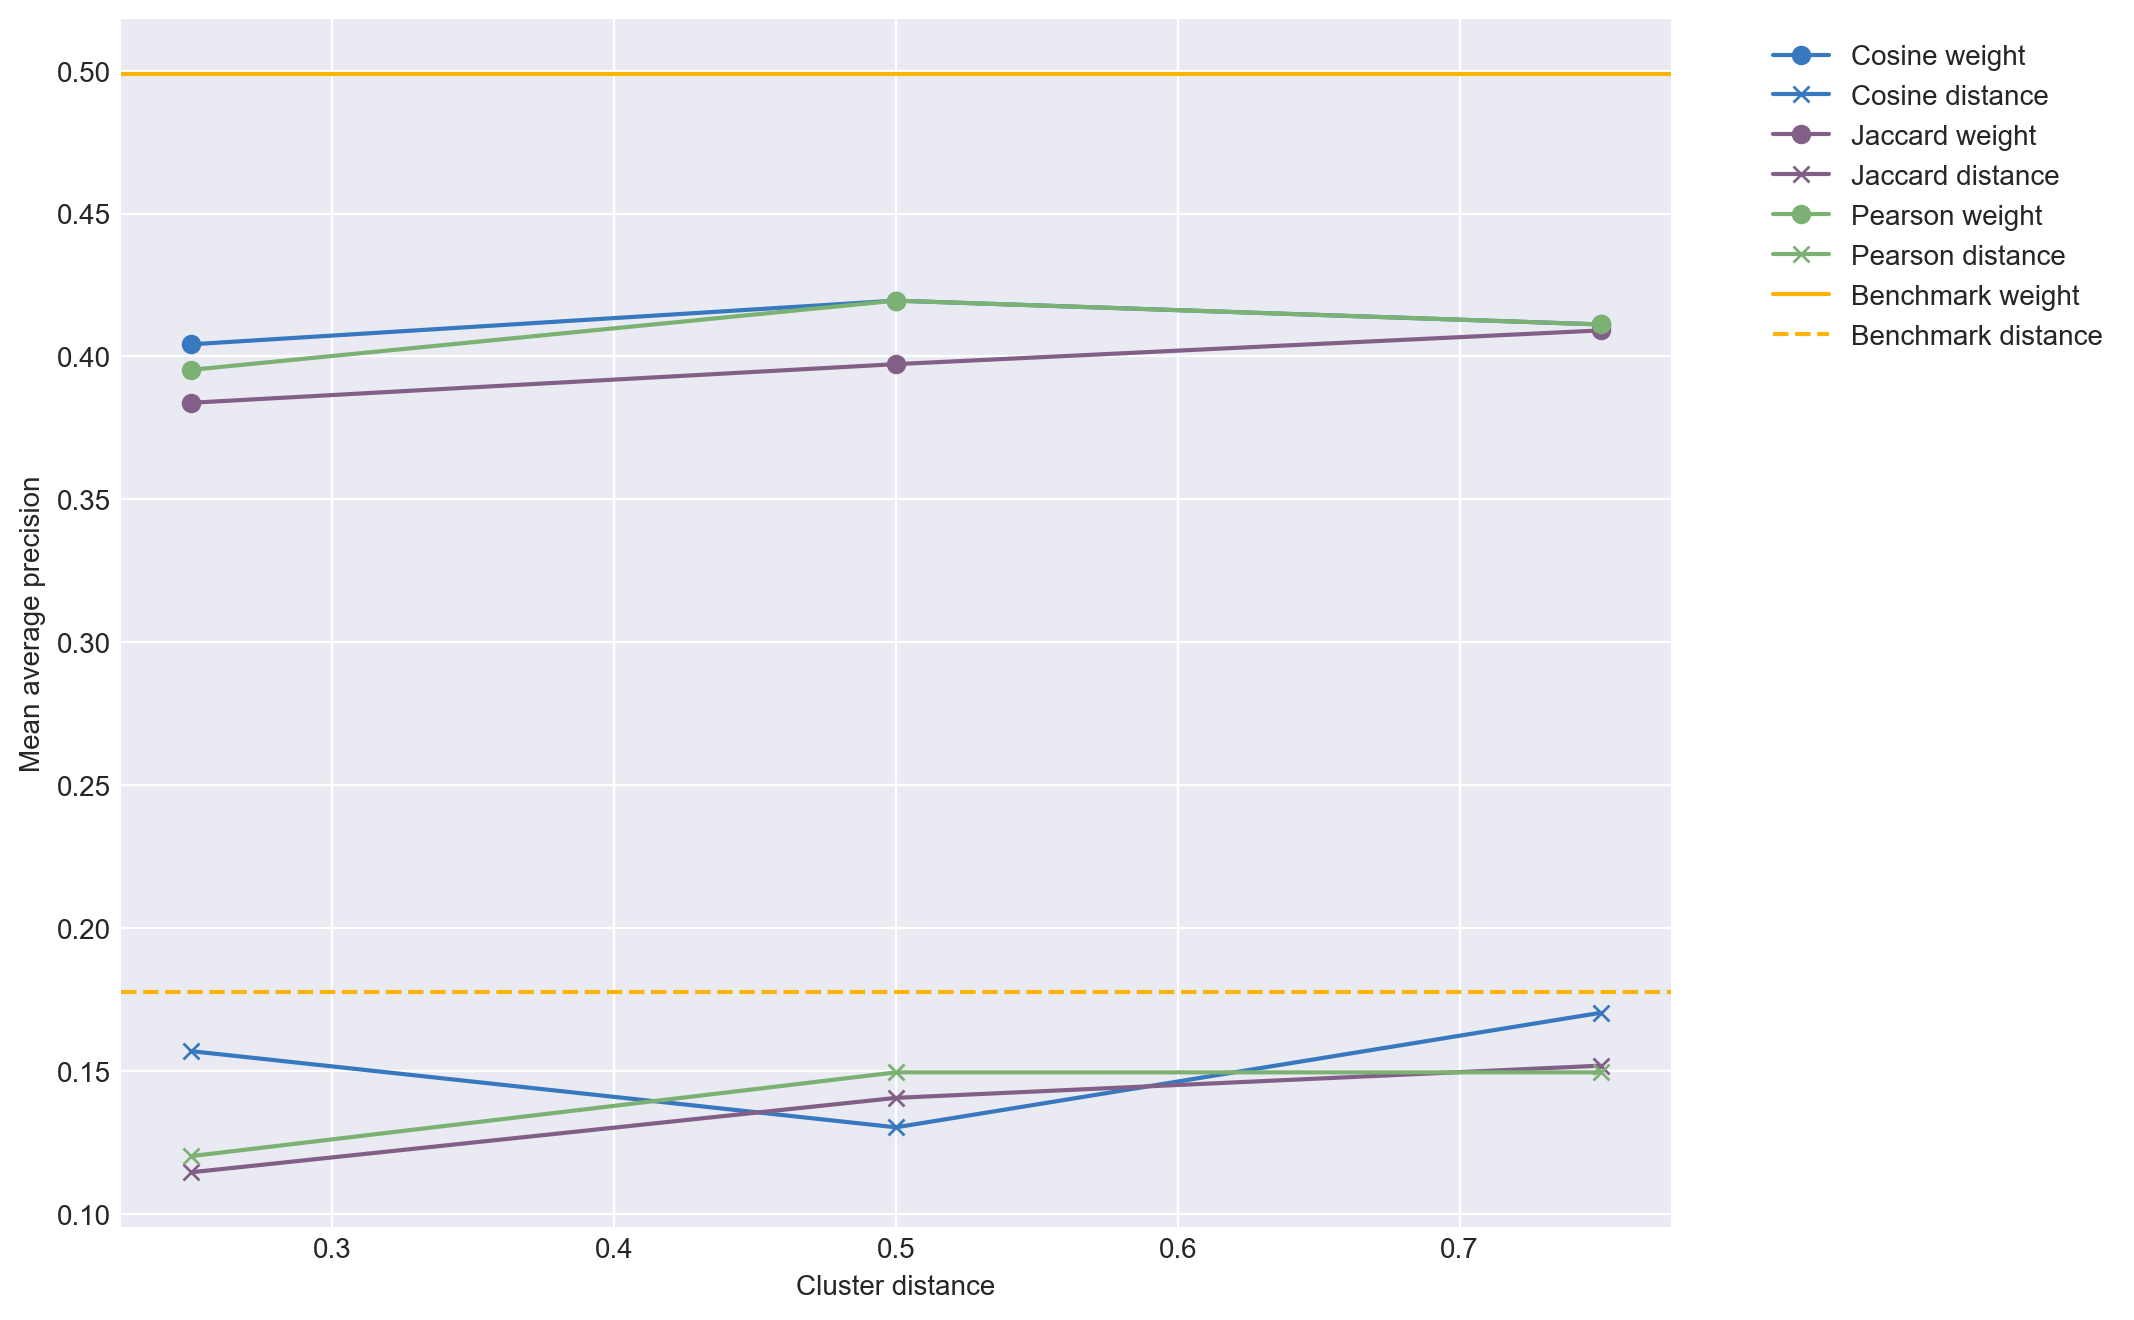

In [36]:
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")

for index in range(0,len(three_distance_metric___list)):
    temp_MAP_weight = [item[index] for item in MAP_weight__constant]
    temp_MAP_distance = [item[index] for item in MAP_distance__constant]
    plt.plot(cluster_distance___, temp_MAP_weight,color=sns_palette[index], marker="o", label=three_distance_metric___list[index].title()+" weight")
    plt.plot(cluster_distance___, temp_MAP_distance,color=sns_palette[index],marker="x", label=three_distance_metric___list[index].title()+" distance")

plt.axhline(y=Benchmark_MAP_weight, color = sns.xkcd_rgb["amber"], linestyle='-', label="Benchmark weight")
plt.axhline(y=Benchmark_MAP_distance, color = sns.xkcd_rgb["amber"], linestyle='--', label="Benchmark distance")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Mean average precision')
plt.xlabel('Cluster distance')
plt.savefig("output/MAP_cluster_constant_distance.png",bbox_inches='tight')


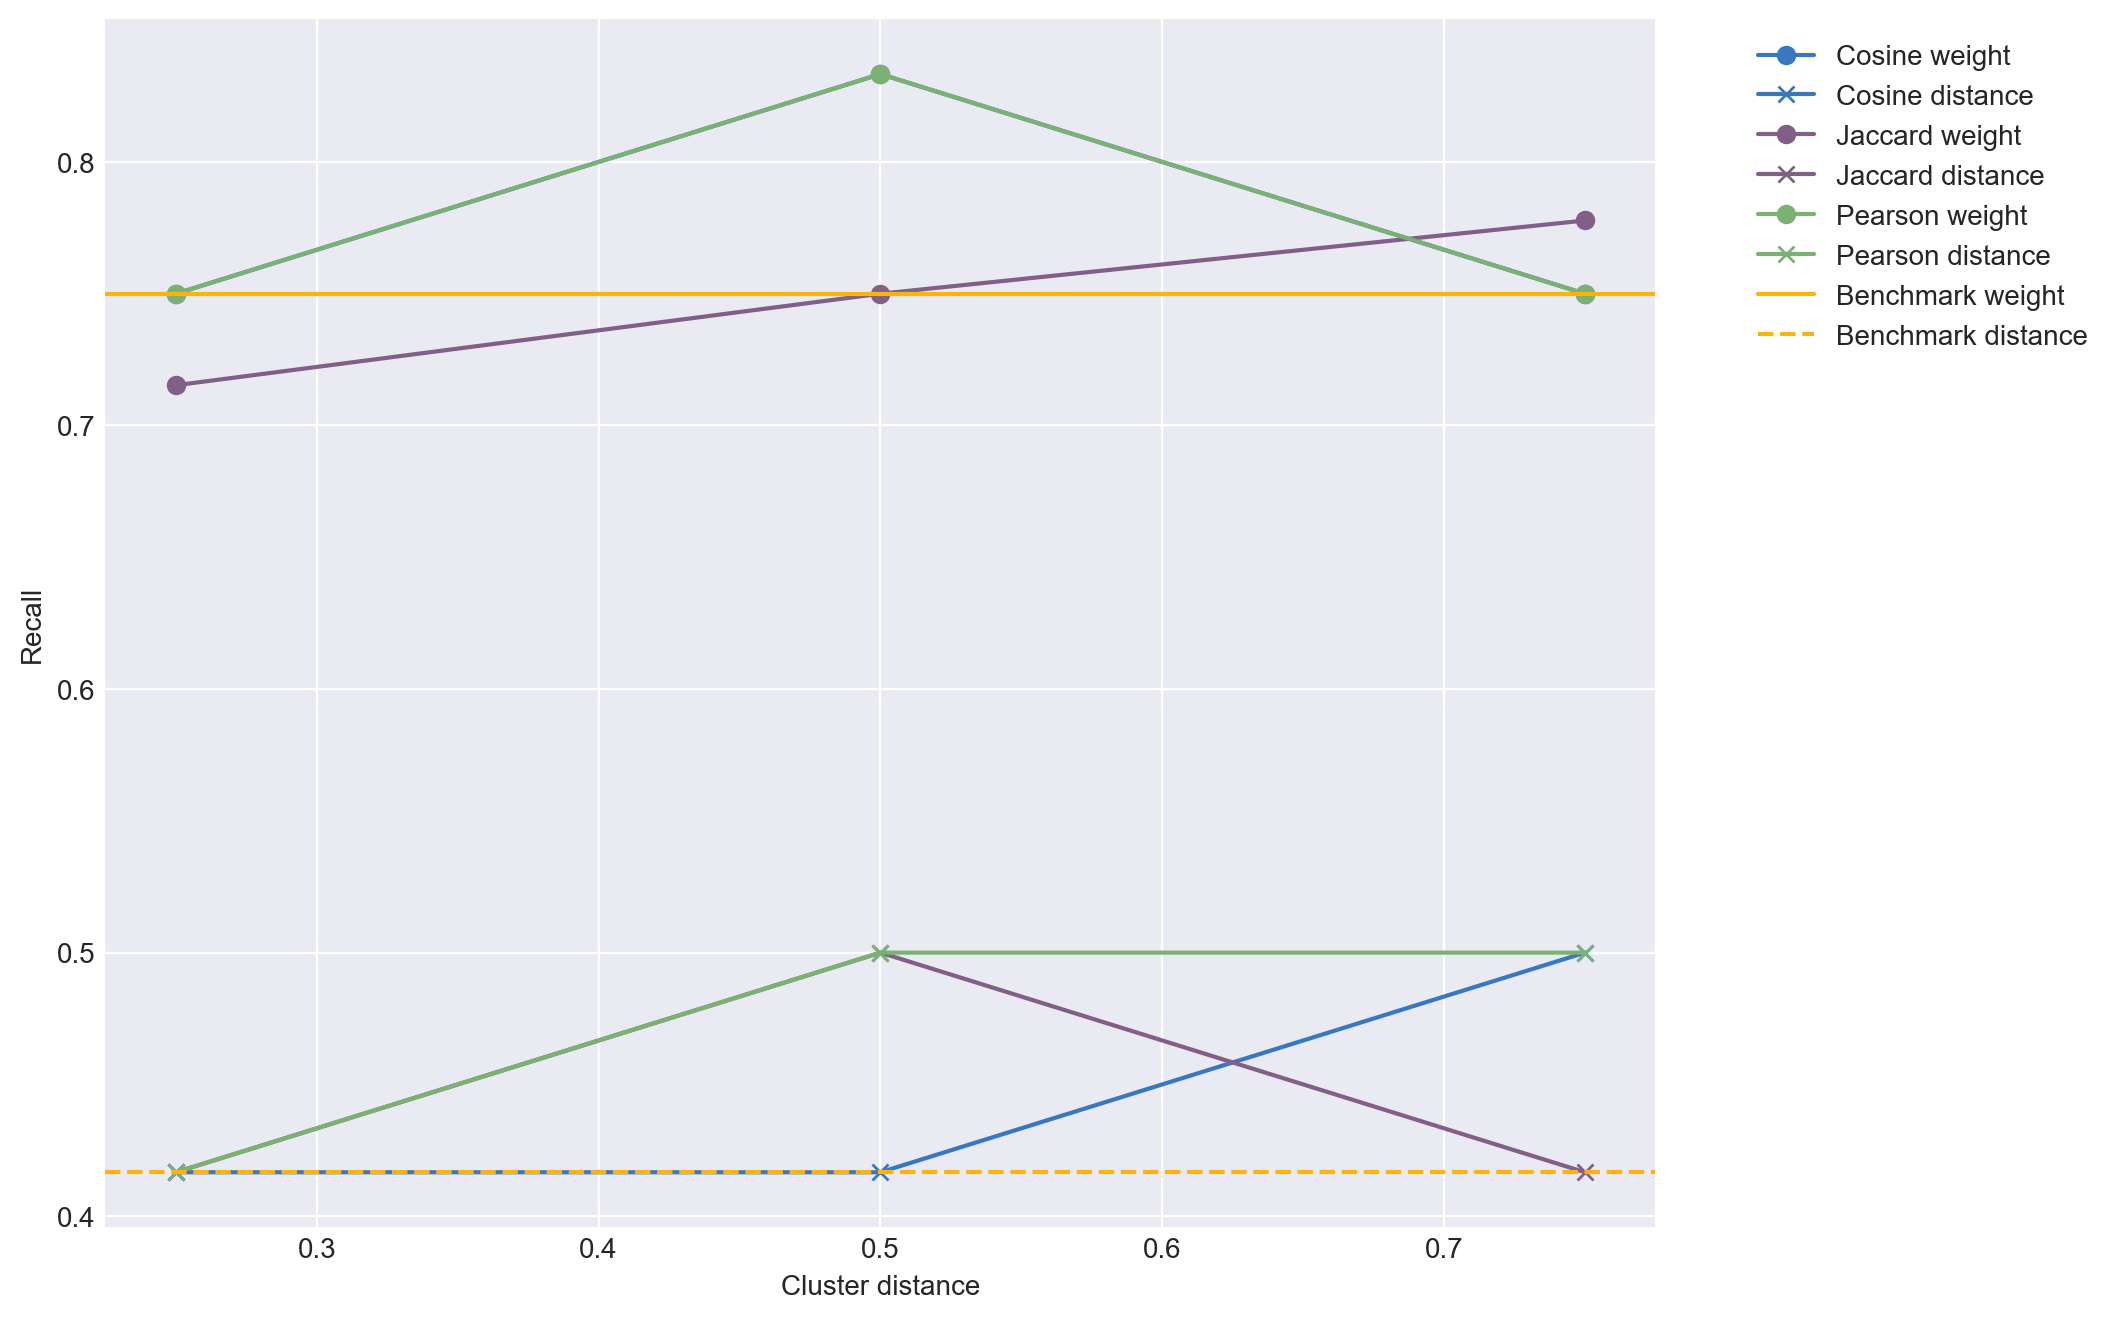

In [38]:
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")

for index in range(0,len(three_distance_metric___list)):
    temp_MAP_weight = [item[index] for item in Recall_weight__constant]
    temp_MAP_distance = [item[index] for item in Recall_distance__constant]
    plt.plot(cluster_distance___, temp_MAP_weight,color=sns_palette[index], marker="o", label=three_distance_metric___list[index].title()+" weight")
    plt.plot(cluster_distance___, temp_MAP_distance,color=sns_palette[index],marker="x", label=three_distance_metric___list[index].title()+" distance")

plt.axhline(y=Benchmark_recall_weight, color = sns.xkcd_rgb["amber"], linestyle='-', label="Benchmark weight")
plt.axhline(y=Benchmark_recall_distance, color = sns.xkcd_rgb["amber"], linestyle='--', label="Benchmark distance")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Recall')
plt.xlabel('Cluster distance')
plt.savefig("output/Recall_cluster_constant_distance.png",bbox_inches='tight')

In [59]:
# Cut filter threshold to not exceed 0.5
Constant_cluster_thrshold_0_5 = Constant_cluster_thrshold[2]
# Cut_filter
MAP_compare__ = [ i,j for i,j in zip(Constant_cluster_thrshold_0_5[0], Cut_filter[0])]
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")
x=[0,1,2]
MAP_compare__
sns.barplot(MAP_compare__)
# plt.scatter(x=x,y=Constant_cluster_thrshold_0_5[0], marker="o")
# plt.scatter(x=x,y=Cut_filter[0], marker="x")
        

SyntaxError: invalid syntax (<ipython-input-59-44f2f754a318>, line 4)

In [15]:
knn_MAP_RECALL_list = [[[0.44368131868131866, 0.4244505494505494, 0.44368131868131866], [0.7692307692307693, 0.7307692307692307, 0.7692307692307693], [0.1517094017094017, 0.13771367521367522, 0.13247863247863248], [0.5, 0.5, 0.5]], [[0.4708180708180708, 0.4491452991452991, 0.4708180708180708], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.1517094017094017, 0.1329059829059829, 0.13247863247863248], [0.5, 0.5, 0.5]], [[0.44764957264957267, 0.4264957264957265, 0.44764957264957267], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.1517094017094017, 0.13376068376068376, 0.13247863247863248], [0.5, 0.5, 0.5]], [[0.4438034188034188, 0.4252136752136752, 0.4438034188034188], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.1594017094017094, 0.12606837606837606, 0.13247863247863248], [0.5769230769230769, 0.4230769230769231, 0.5]], [[0.4375763125763126, 0.4233821733821734, 0.4375763125763126], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.16132478632478633, 0.1168803418803419, 0.1420940170940171], [0.5769230769230769, 0.4230769230769231, 0.5769230769230769]], [[0.4375763125763126, 0.4244505494505494, 0.4375763125763126], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.16132478632478633, 0.12542735042735045, 0.1420940170940171], [0.5769230769230769, 0.5, 0.5769230769230769]], [[0.4375763125763126, 0.4244505494505494, 0.4375763125763126], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.16132478632478633, 0.12451159951159951, 0.1420940170940171], [0.5769230769230769, 0.5, 0.5769230769230769]], [[0.4375763125763126, 0.4244505494505494, 0.4375763125763126], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.16132478632478633, 0.12382478632478633, 0.1420940170940171], [0.5769230769230769, 0.5, 0.5769230769230769]], [[0.4375763125763126, 0.4244505494505494, 0.4375763125763126], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.17414529914529914, 0.12199328449328449, 0.1420940170940171], [0.5769230769230769, 0.5, 0.5769230769230769]], [[0.4375763125763126, 0.4244505494505494, 0.4375763125763126], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.17414529914529914, 0.10715811965811965, 0.1420940170940171], [0.5769230769230769, 0.4230769230769231, 0.5769230769230769]], [[0.4375763125763126, 0.4244505494505494, 0.4375763125763126], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.17414529914529914, 0.1061965811965812, 0.1420940170940171], [0.5769230769230769, 0.4230769230769231, 0.5769230769230769]], [[0.4375763125763126, 0.4244505494505494, 0.4375763125763126], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.172008547008547, 0.10235042735042735, 0.15277777777777776], [0.5769230769230769, 0.38461538461538464, 0.5769230769230769]], [[0.4367216117216117, 0.42359584859584853, 0.4367216117216117], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.1574786324786325, 0.08611111111111111, 0.1420940170940171], [0.5384615384615384, 0.34615384615384615, 0.5769230769230769]], [[0.4367216117216117, 0.42359584859584853, 0.4367216117216117], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.15064102564102566, 0.08226495726495726, 0.13141025641025642], [0.5384615384615384, 0.2692307692307692, 0.5384615384615384]], [[0.4367216117216117, 0.42359584859584853, 0.4367216117216117], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.14594017094017095, 0.08226495726495726, 0.12670940170940173], [0.5384615384615384, 0.2692307692307692, 0.5384615384615384]], [[0.4367216117216117, 0.42359584859584853, 0.4367216117216117], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.14594017094017095, 0.08867521367521367, 0.12564102564102567], [0.5384615384615384, 0.2692307692307692, 0.5384615384615384]], [[0.4367216117216117, 0.42359584859584853, 0.4367216117216117], [0.8461538461538461, 0.8076923076923077, 0.8461538461538461], [0.1297008547008547, 0.08867521367521367, 0.12722832722832725], [0.5, 0.2692307692307692, 0.5384615384615384]]]

# [[[0.4436813187,
# 0.4244505495,
# 0.4436813187,]
# ,
# [0.7692307692,
# 0.7307692308,
# 0.7692307692,]
# ,
# [0.1517094017,
# 0.1377136752,
# 0.1324786325,]
# ,
# [0.5,
# 0.5,
# 0.5]],

# [[0.4708180708,
# 0.4491452991,
# 0.4708180708,]
# ,
# [0.8461538462,
# 0.8076923077,
# 0.8461538462,]
# ,
# [0.1517094017,
# 0.1329059829,
# 0.1324786325,]
# ,
# [0.5,
# 0.5,
# 0.5]],

# [[0.4476495726,
# 0.4264957265,
# 0.4476495726,]
# ,
# [0.8461538462,
# 0.8076923077,
# 0.8461538462,]
# ,
# [0.1517094017,
# 0.1337606838,
# 0.1324786325,]
# ,
# [0.5,
# 0.5,
# 0.5]],

# [[0.4438034188,
# 0.4252136752,
# 0.4438034188,]
# ,
# [0.8461538462,
# 0.8076923077,
# 0.8461538462,]
# ,
# [0.1594017094,
# 0.1260683761,
# 0.1324786325,]
# ,
# [0.5769230769,
# 0.4230769231,
# 0.5]],

# [[0.4375763126,
# 0.4233821734,
# 0.4375763126,]
# ,
# [0.8461538462,
# 0.8076923077,
# 0.8461538462,]
# ,
# [0.1613247863,
# 0.1168803419,
# 0.1420940171,]
# ,
# [0.5769230769,
# 0.4230769231,
# 0.5769230769]],
 

# [[0.4375763126,
# 0.4244505495,
# 0.4375763126,]
# ,
# [0.8461538462,
# 0.8076923077,
# 0.8461538462,]
# ,
# [0.1613247863,
# 0.1254273504,
# 0.1420940171,]
# ,
# [0.5769230769,
# 0.5,
# 0.5769230769,]],
 
# [[0.4375763126,
# 0.4244505495,
# 0.4375763126,]
# ,
# [0.8461538462,
# 0.8076923077,
# 0.8461538462,]
# ,
# [0.1613247863,
# 0.1245115995,
# 0.1420940171,]
# ,
# [0.5769230769,
# 0.5,
# 0.5769230769,]],
 
# [[0.4375763126,
# 0.4244505495,
# 0.4375763126,]
# ,
# [0.8461538462,
# 0.8076923077,
# 0.8461538462,]
# ,
# [0.1613247863,
# 0.1238247863,
# 0.1420940171,]
# ,
# [0.5769230769,
# 0.5,
# 0.5769230769]],

# [[0.4375763126,
# 0.4244505495,
# 0.4375763126],

# [0.8461538462,
# 0.8076923077,
# 0.8461538462],

# [0.1741452991,
# 0.1219932845,
# 0.1420940171],

# [0.5769230769,
# 0.5,
# 0.5769230769]],

# [[0.4375763126,
# 0.4244505495,
# 0.4375763126],

# [0.8461538462,
# 0.8076923077,
# 0.8461538462],

# [0.1741452991,
# 0.1071581197,
# 0.1420940171],

# [0.5769230769,
# 0.4230769231,
# 0.5769230769]],

 
# [
# [
# 0.437576312576,
# 0.424450549451,
# 0.437576312576,],
# [
# 0.846153846154,
# 0.807692307692,
# 0.846153846154,],
# [
# 0.174145299145,
# 0.106196581197,
# 0.142094017094,],
# [
# 0.576923076923,
# 0.423076923077,
# 0.576923076923,],
# ]

# [
# [
# 0.437576312576 ,
# 0.424450549451 ,
# 0.437576312576 ,
# ],
# [
# 0.846153846154 ,
# 0.807692307692 ,
# 0.846153846154 ,
# ],
# [
# 0.172008547009 ,
# 0.10235042735 ,
# 0.152777777778 ,
# ],
# [
# 0.576923076923 ,
# 0.384615384615 ,
# 0.576923076923 ,
# ],
# ],

# [
# 	[
# 	0.436721611722 ,
# 	0.423595848596 ,
# 	0.436721611722 ,
# 	],
# 	[
# 	0.846153846154 ,
# 	0.807692307692 ,
# 	0.846153846154 ,
# 	],
# 	[
# 	0.157478632479 ,
# 	0.0861111111111 ,
# 	0.142094017094 ,
# 	],
# 	[
# 	0.538461538462 ,
# 	0.346153846154 ,
# 	0.576923076923 ,
# 	],
# ],

# [
# 	[
# 	0.436721611722 ,
# 	0.423595848596 ,
# 	0.436721611722 ,
# 	],
# 	[
# 	0.846153846154 ,
# 	0.807692307692 ,
# 	0.846153846154 ,
# 	],
# 	[
# 	0.150641025641 ,
# 	0.082264957265 ,
# 	0.13141025641 ,
# 	],
# 	[
# 	0.538461538462 ,
# 	0.269230769231 ,
# 	0.538461538462 ,
# 	],
# ],

# [
# 	[
# 	0.436721611722 ,
# 	0.423595848596 ,
# 	0.436721611722 ,
# 	],
# 	[
# 	0.846153846154 ,
# 	0.807692307692 ,
# 	0.846153846154 ,
# 	],
# 	[
# 	0.14594017094 ,
# 	0.082264957265 ,
# 	0.126709401709 ,
# 	],
# 	[
# 	0.538461538462 ,
# 	0.269230769231 ,
# 	0.538461538462 ,
# 	],
# ],

# [
# 	[
# 	0.436721611722 ,
# 	0.423595848596 ,
# 	0.436721611722 ,
# 	],
# 	[
# 	0.846153846154 ,
# 	0.807692307692 ,
# 	0.846153846154 ,
# 	],
# 	[
# 	0.14594017094 ,
# 	0.0886752136752 ,
# 	0.125641025641 ,
# 	],
# 	[
# 	0.538461538462 ,
# 	0.269230769231 ,
# 	0.538461538462 ,
# 	],
# ],

# [
# 	[
# 	0.436721611722 ,
# 	0.423595848596 ,
# 	0.436721611722 ,
# 	],
# 	[
# 	0.846153846154 ,
# 	0.807692307692 ,
# 	0.846153846154 ,
# 	],
# 	[
# 	0.129700854701 ,
# 	0.0886752136752 ,
# 	0.127228327228 ,
# 	],
# 	[
# 	0.5 ,
# 	0.269230769231 ,
# 	0.538461538462 ,
# 	],
# ],
 
MAP_weight__knn = [item[0] for item in knn_MAP_RECALL_list]
Recall_weight__knn = [item[1] for item in knn_MAP_RECALL_list]
MAP_distance__knn = [item[2] for item in knn_MAP_RECALL_list]
Recall_distance__knn = [item[3] for item in knn_MAP_RECALL_list]
knn_list = list(range(1,11)) + [12,15,20,25,30,35,40]

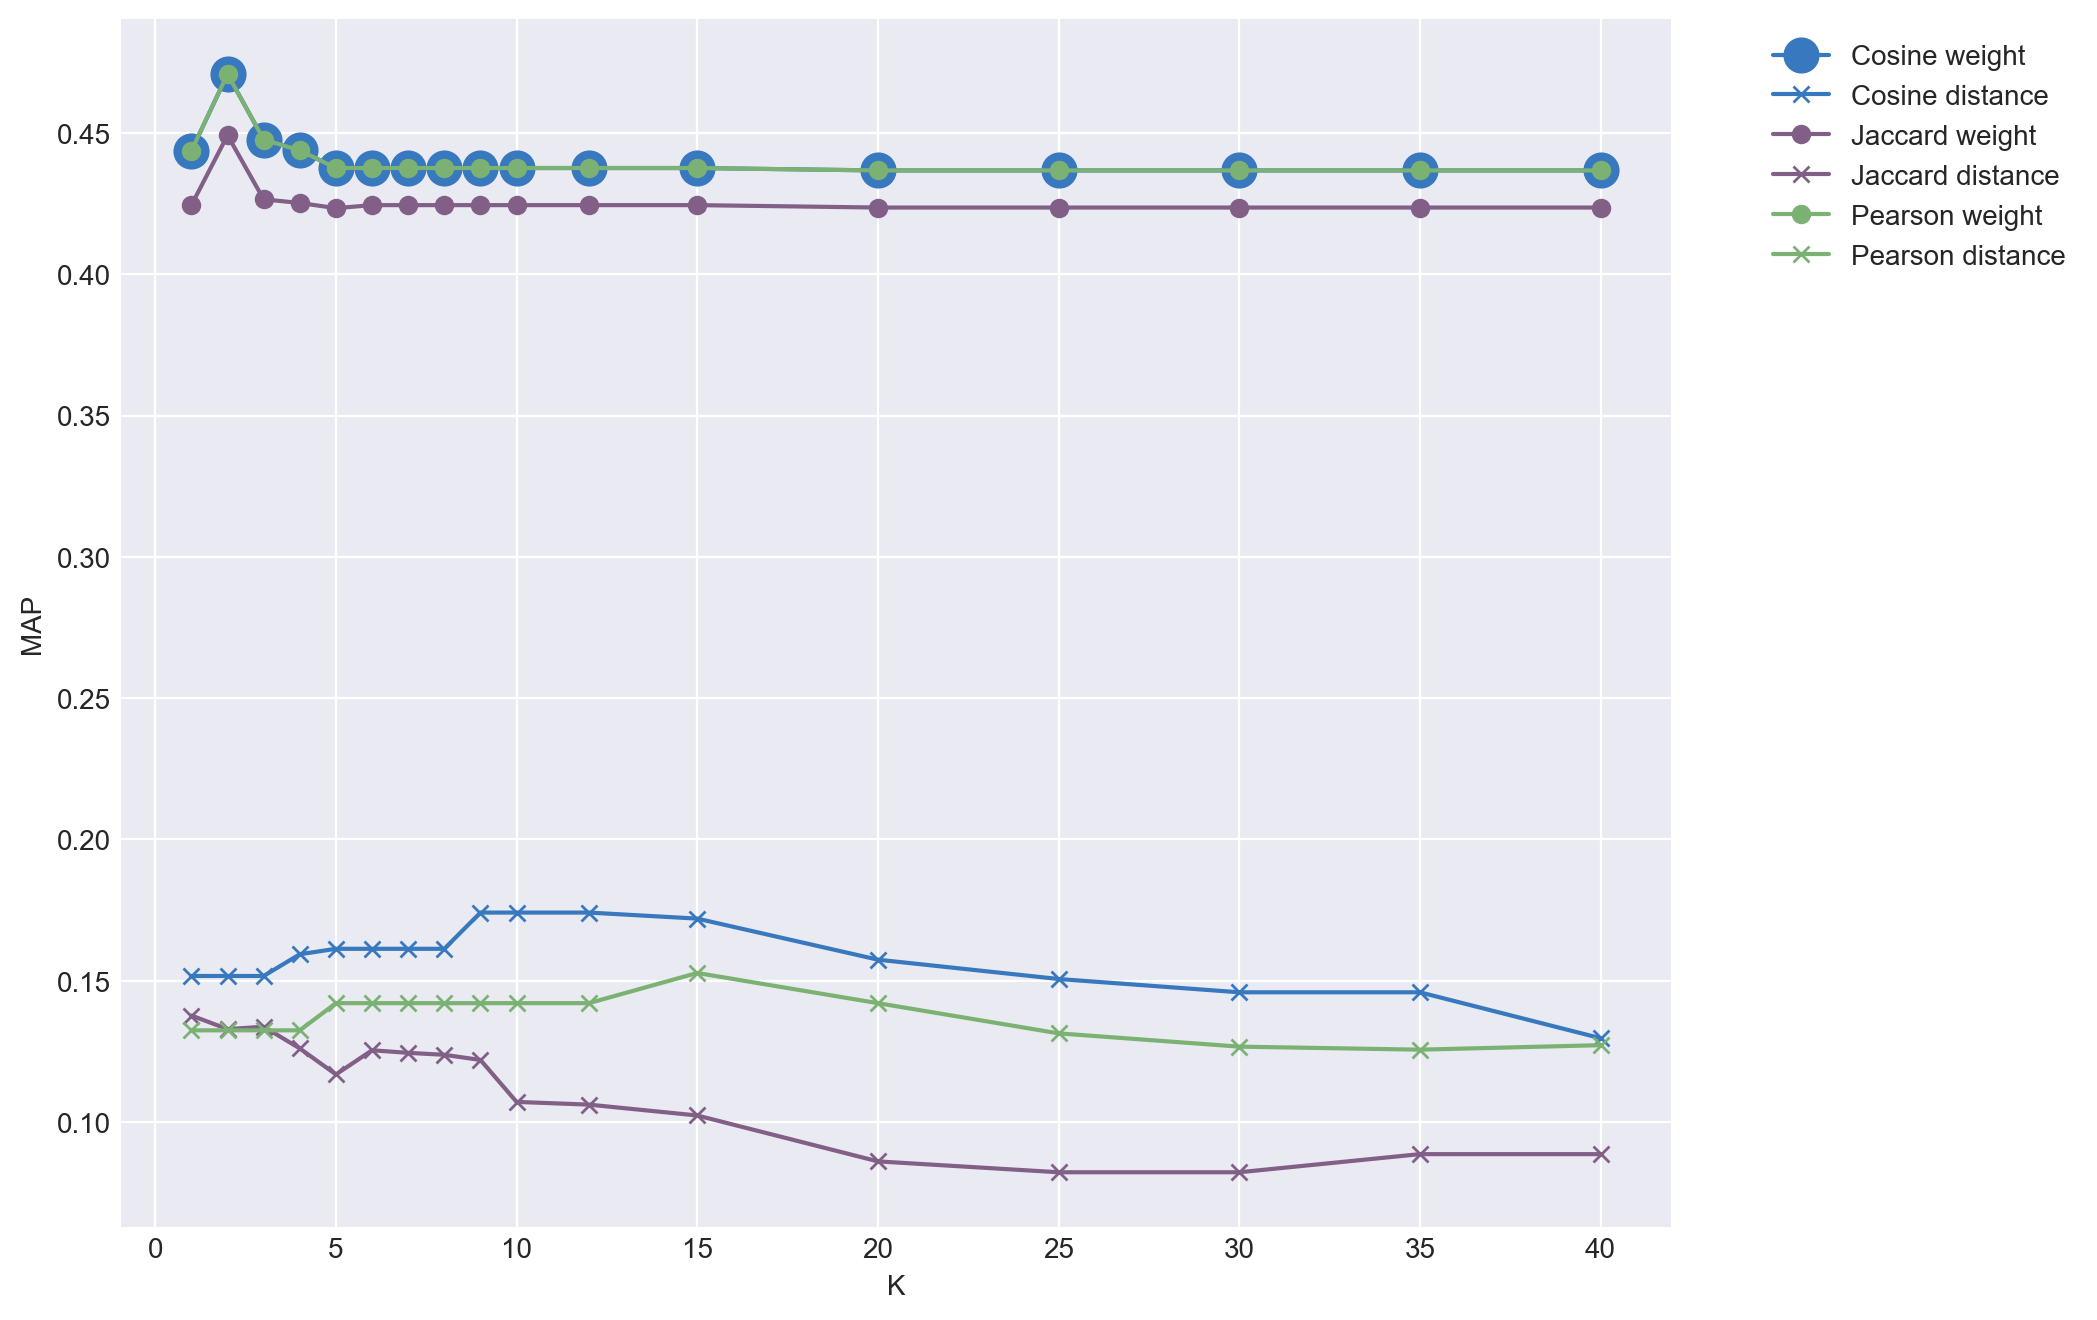

In [31]:
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")

for index in range(0,len(three_distance_metric___list)):
    temp_MAP_weight = [item[index] for item in MAP_weight__knn]
    temp_MAP_distance = [item[index] for item in MAP_distance__knn]
    if index == 0:
        plt.plot(knn_list, temp_MAP_weight,color=sns_palette[index], marker="o",markersize=12, label=three_distance_metric___list[index].title()+" weight")
    else:
        plt.plot(knn_list, temp_MAP_weight,color=sns_palette[index], marker="o", label=three_distance_metric___list[index].title()+" weight")
    plt.plot(knn_list, temp_MAP_distance,color=sns_palette[index],marker="x", label=three_distance_metric___list[index].title()+" distance")

    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('MAP')
plt.xlabel('K')
plt.savefig("output/MAP_knn.png",bbox_inches='tight')

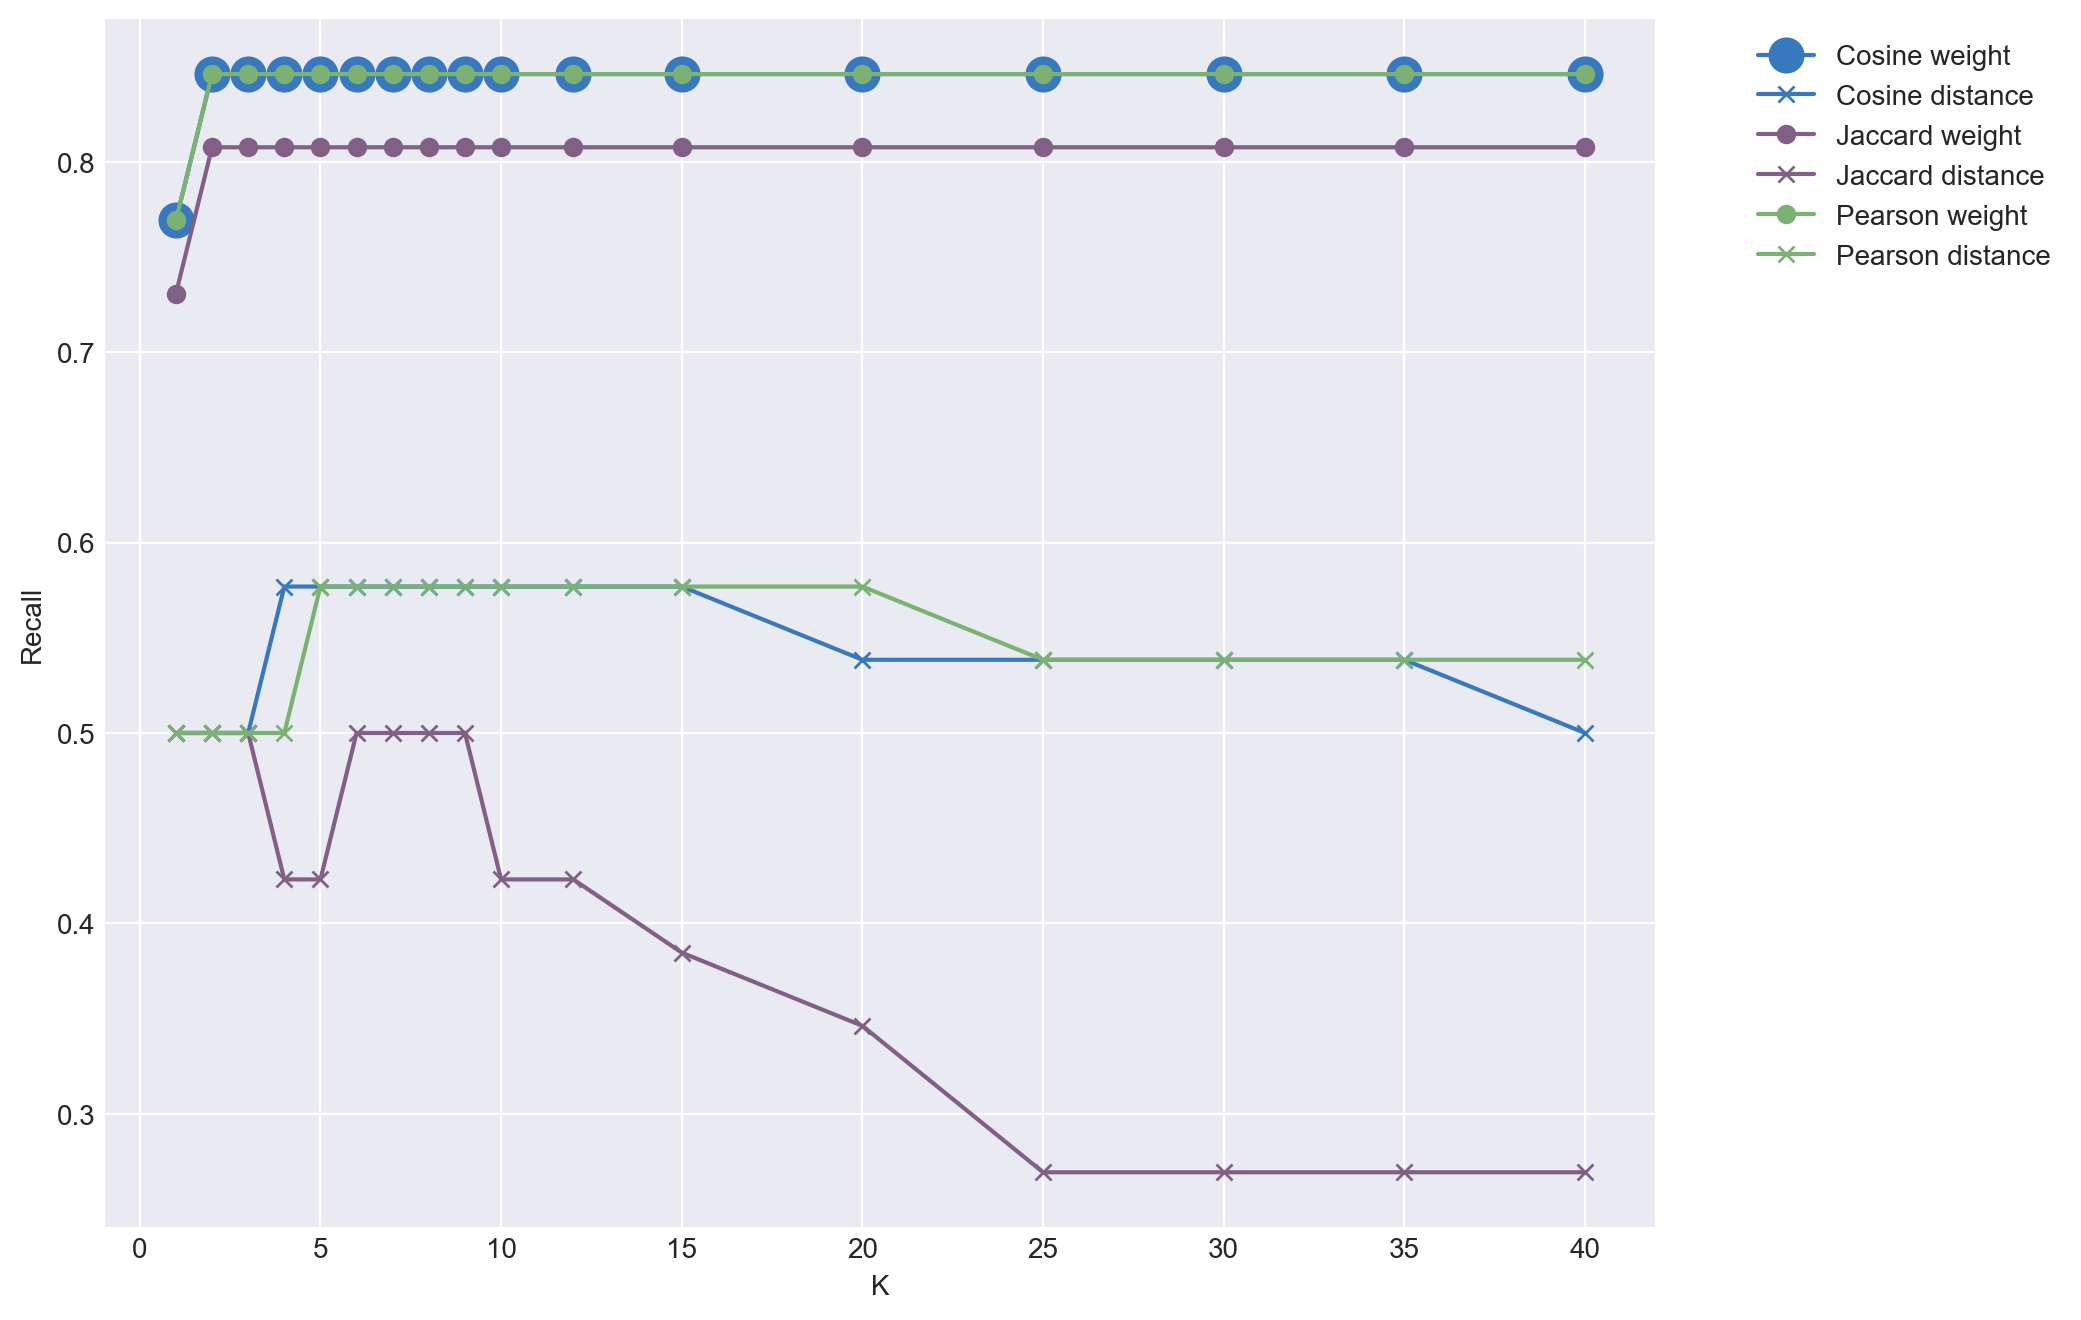

In [30]:
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")

for index in range(0,len(three_distance_metric___list)):
    temp_MAP_weight = [item[index] for item in Recall_weight__knn]
    temp_MAP_distance = [item[index] for item in Recall_distance__knn]
    if index == 0:
        plt.plot(knn_list, temp_MAP_weight,color=sns_palette[index], marker="o",markersize=12, label=three_distance_metric___list[index].title()+" weight")
    else:
        plt.plot(knn_list, temp_MAP_weight,color=sns_palette[index], marker="o", label=three_distance_metric___list[index].title()+" weight")
#     plt.plot(knn_list, temp_MAP_weight,color=sns_palette[index], marker="o", label=three_distance_metric___list[index].title()+" weight")
    plt.plot(knn_list, temp_MAP_distance,color=sns_palette[index],marker="x", label=three_distance_metric___list[index].title()+" distance")

    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Recall')
plt.xlabel('K')
plt.savefig("output/Recall_knn.png",bbox_inches='tight')

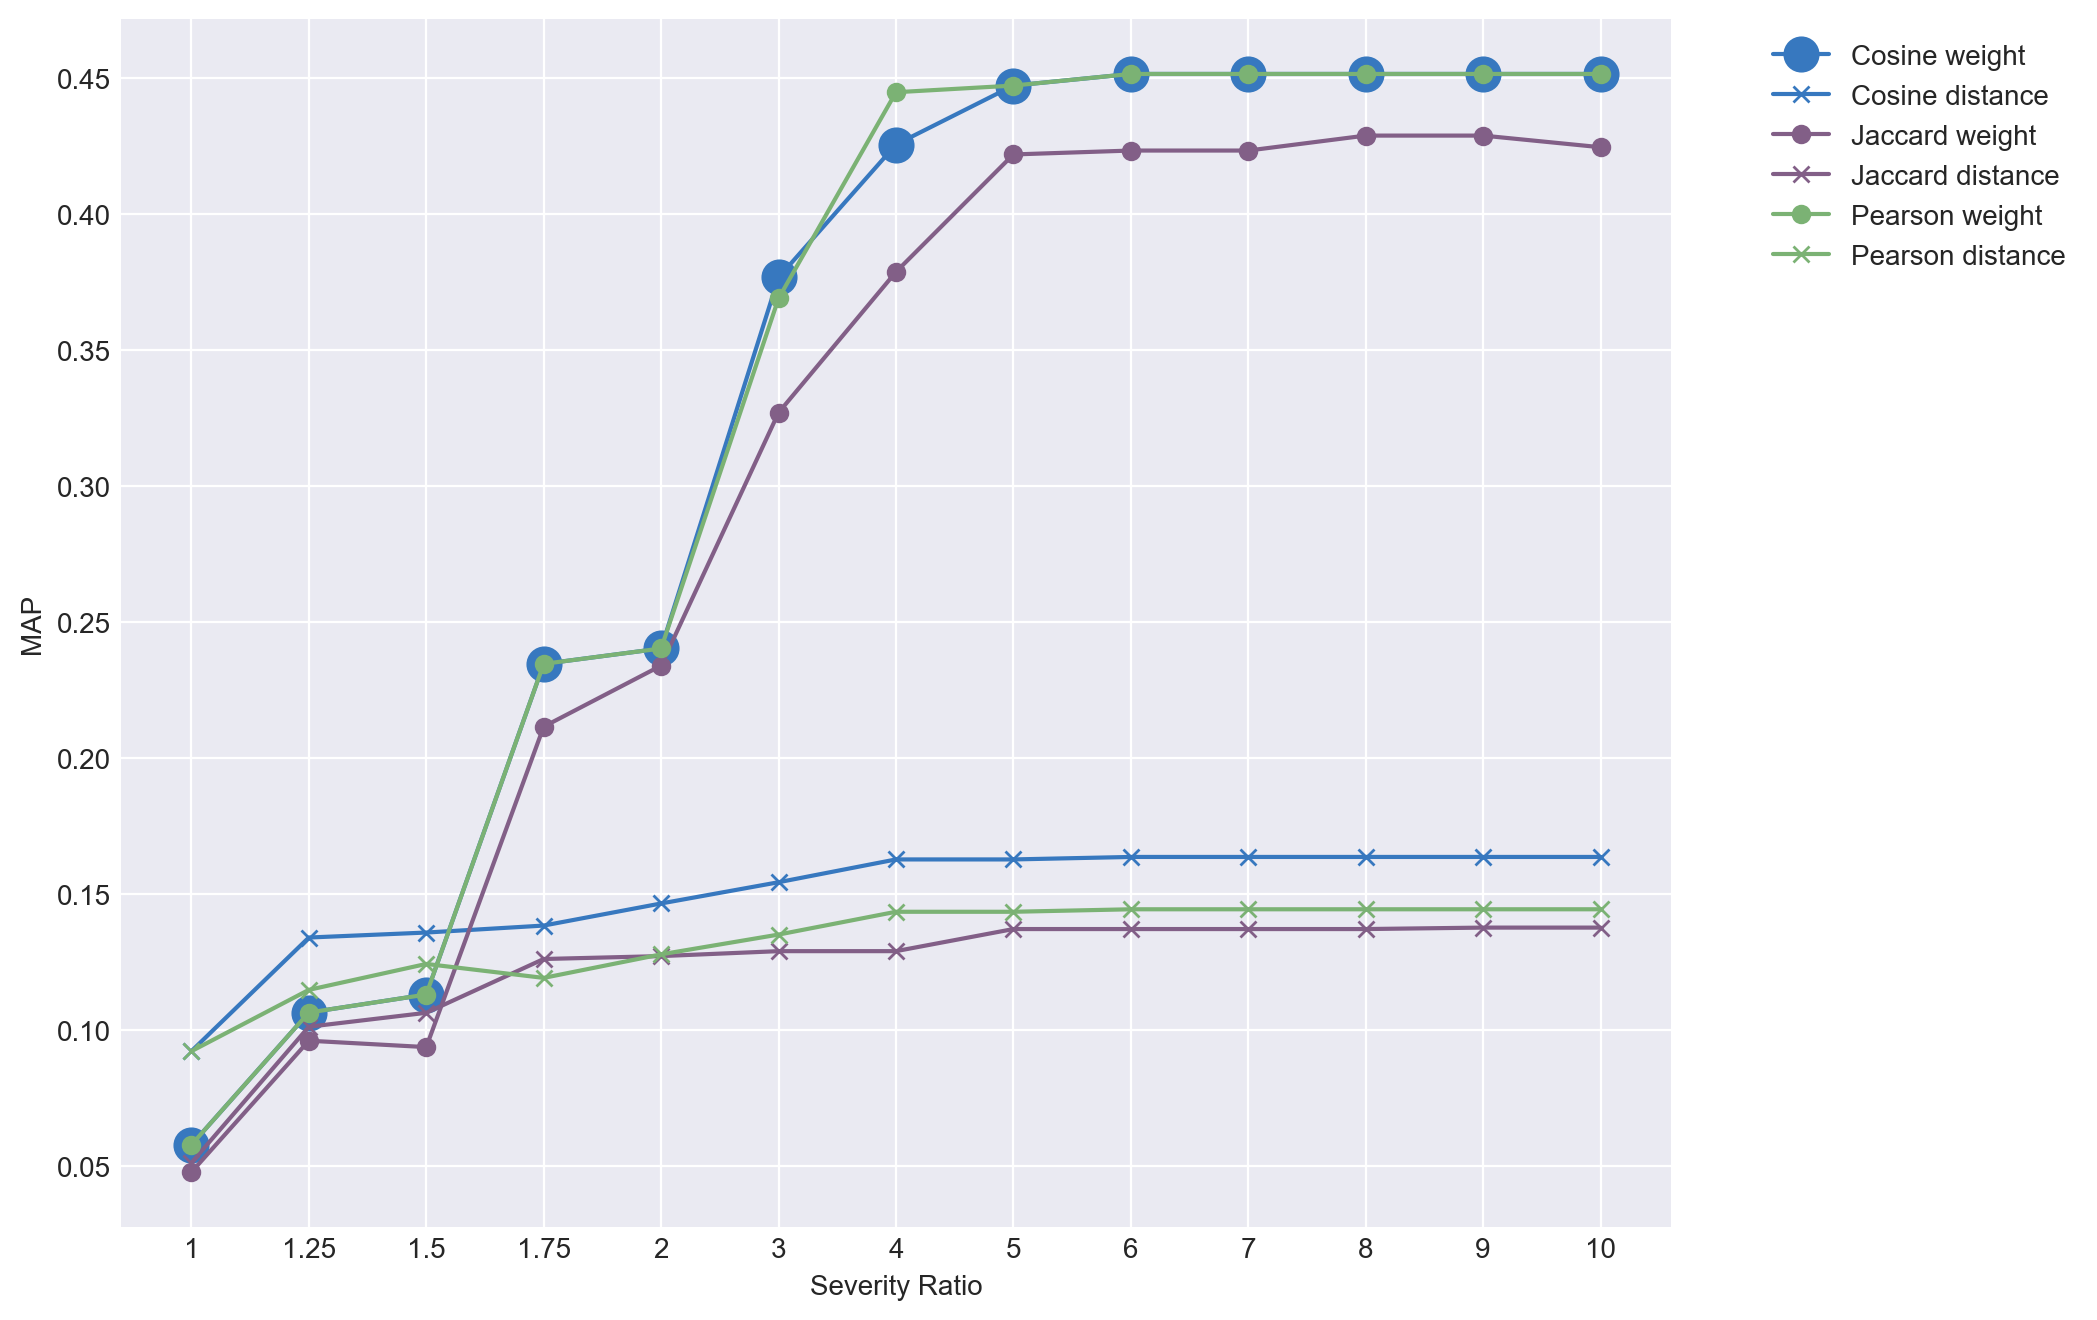

In [37]:
severity_tuple_list=['(1, 1, 1)', '(1, 1.25, 1.5625)', '(1, 1.5, 1.25)', '(1, 1.75, 3.0625)', '(1, 2, 4)', '(1, 3, 9)', '(1, 4, 16)', '(1, 5, 25)', '(1, 6, 36)', '(1, 7, 49)', '(1, 8, 64)', '(1, 9, 81)', '(1, 10, 100)']
severity_list = list(range(1,len(severity_tuple_list)+1))
data_severity__ = [[[0.057905982905982895, 0.04786324786324787, 0.057905982905982895], [0.34615384615384615, 0.3162393162393162, 0.34615384615384615], [0.0923076923076923, 0.05129349816849817, 0.0923076923076923], [0.34615384615384615, 0.27884615384615385, 0.34615384615384615]], [[0.1065018315018315, 0.09615384615384616, 0.1065018315018315], [0.46153846153846156, 0.43589743589743585, 0.46153846153846156], [0.13406593406593406, 0.10128205128205127, 0.11483516483516484], [0.38461538461538464, 0.4, 0.38461538461538464]], [[0.11312576312576311, 0.09380341880341882, 0.11312576312576311], [0.46153846153846156, 0.36538461538461536, 0.46153846153846156], [0.13589743589743591, 0.1064102564102564, 0.12435897435897436], [0.38461538461538464, 0.46153846153846156, 0.46153846153846156]], [[0.23461538461538461, 0.21153846153846154, 0.23461538461538461], [0.5384615384615384, 0.46153846153846156, 0.5384615384615384], [0.13846153846153847, 0.1261752136752137, 0.11923076923076924], [0.38461538461538464, 0.5, 0.38461538461538464]], [[0.24027777777777776, 0.233974358974359, 0.24027777777777776], [0.5384615384615384, 0.5, 0.5384615384615384], [0.14658119658119656, 0.12724358974358976, 0.1278846153846154], [0.4230769230769231, 0.5, 0.4230769230769231]], [[0.3765873015873016, 0.3269230769230769, 0.3688949938949939], [0.8461538461538461, 0.6794871794871794, 0.7692307692307693], [0.1543803418803419, 0.12905982905982907, 0.13514957264957264], [0.4230769230769231, 0.46153846153846156, 0.4230769230769231]], [[0.42542735042735036, 0.3786324786324787, 0.44465811965811963], [0.8461538461538461, 0.6923076923076923, 0.8461538461538461], [0.16275946275946274, 0.12905982905982907, 0.14352869352869352], [0.5, 0.46153846153846156, 0.5]], [[0.44710012210012207, 0.42179487179487174, 0.44710012210012207], [0.8461538461538461, 0.7307692307692307, 0.8461538461538461], [0.16275946275946274, 0.1371794871794872, 0.14352869352869352], [0.5, 0.5, 0.5]], [[0.4513736263736264, 0.42322954822954817, 0.4513736263736264], [0.8461538461538461, 0.7307692307692307, 0.8461538461538461], [0.16367521367521368, 0.1371794871794872, 0.14444444444444443], [0.5, 0.5, 0.5]], [[0.4513736263736264, 0.42322954822954817, 0.4513736263736264], [0.8461538461538461, 0.7307692307692307, 0.8461538461538461], [0.16367521367521368, 0.1371794871794872, 0.14444444444444443], [0.5, 0.5, 0.5]], [[0.4513736263736264, 0.42872405372405364, 0.4513736263736264], [0.8461538461538461, 0.7692307692307693, 0.8461538461538461], [0.16367521367521368, 0.1371794871794872, 0.14444444444444443], [0.5, 0.5, 0.5]], [[0.4513736263736264, 0.42872405372405364, 0.4513736263736264], [0.8461538461538461, 0.7692307692307693, 0.8461538461538461], [0.16367521367521368, 0.13771367521367522, 0.14444444444444443], [0.5, 0.5, 0.5]], [[0.4513736263736264, 0.4244505494505494, 0.4513736263736264], [0.8461538461538461, 0.7307692307692307, 0.8461538461538461], [0.16367521367521368, 0.13771367521367522, 0.14444444444444443], [0.5, 0.5, 0.5]]]
MAP_weight__severity = [item[0] for item in data_severity__]
Recall_weight__severity = [item[1] for item in data_severity__]
MAP_distance__severity = [item[2] for item in data_severity__]
Recall_distance__severity = [item[3] for item in data_severity__]

plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")
ax = plt.axes()
for index in range(0,len(three_distance_metric___list)):
    temp_MAP_weight = [item[index] for item in MAP_weight__severity]
    temp_MAP_distance = [item[index] for item in MAP_distance__severity]
    if index == 0:
        plt.plot(severity_list, temp_MAP_weight,color=sns_palette[index], marker="o",markersize=12, label=three_distance_metric___list[index].title()+" weight")
    else:
        plt.plot(severity_list, temp_MAP_weight,color=sns_palette[index], marker="o", label=three_distance_metric___list[index].title()+" weight")
#     plt.plot(severity_list, temp_MAP_weight,color=sns_palette[index], marker="o", label=three_distance_metric___list[index].title()+" weight")
    plt.plot(severity_list, temp_MAP_distance,color=sns_palette[index],marker="x", label=three_distance_metric___list[index].title()+" distance")

ax.set_xticklabels([1,1.25,1.5,1.75,2,3,4,5,6,7,8,9,10])
ax.set_xticks(severity_list)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('MAP')
plt.xlabel('Severity Ratio')
plt.savefig("output/MAP_severity.png",bbox_inches='tight')

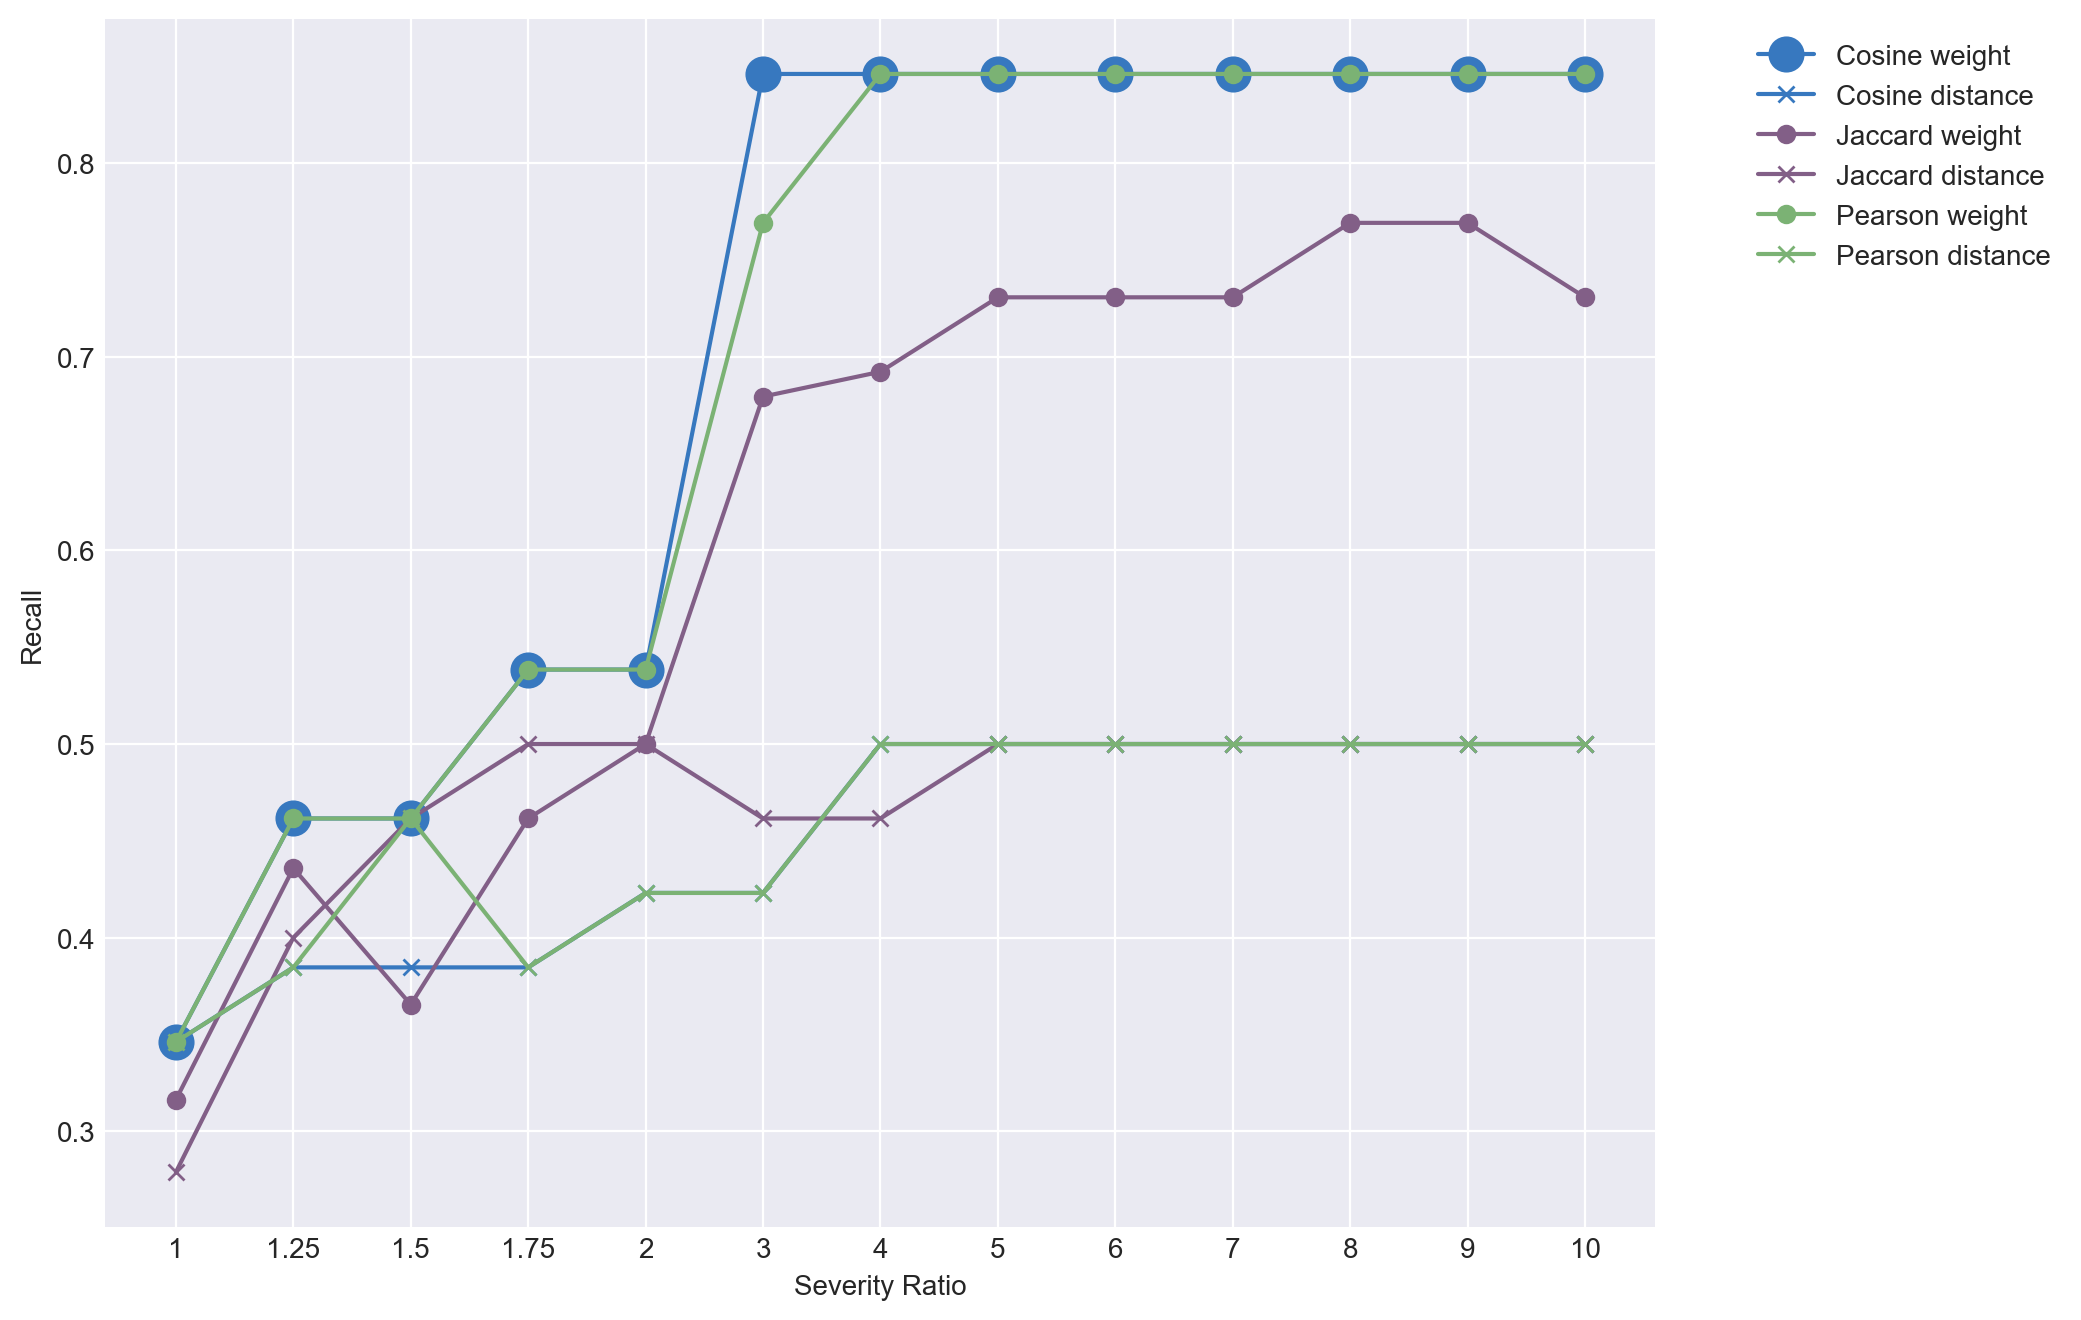

In [36]:
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")
ax = plt.axes()
for index in range(0,len(three_distance_metric___list)):
    temp_recall_weight = [item[index] for item in Recall_weight__severity]
    temp_recall_distance = [item[index] for item in Recall_distance__severity]
    if index == 0:
        plt.plot(severity_list, temp_recall_weight,color=sns_palette[index], marker="o",markersize=12, label=three_distance_metric___list[index].title()+" weight")
    else:
        plt.plot(severity_list, temp_recall_weight,color=sns_palette[index], marker="o", label=three_distance_metric___list[index].title()+" weight")

#     plt.plot(severity_list, temp_recall_weight,color=sns_palette[index], marker="o", label=three_distance_metric___list[index].title()+" weight")
    plt.plot(severity_list, temp_recall_distance,color=sns_palette[index],marker="x", label=three_distance_metric___list[index].title()+" distance")


ax.set_xticklabels([1,1.25,1.5,1.75,2,3,4,5,6,7,8,9,10])
ax.set_xticks(severity_list)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Recall')
plt.xlabel('Severity Ratio')
plt.savefig("output/Recall_severity.png",bbox_inches='tight')